# **Карточка проекта**

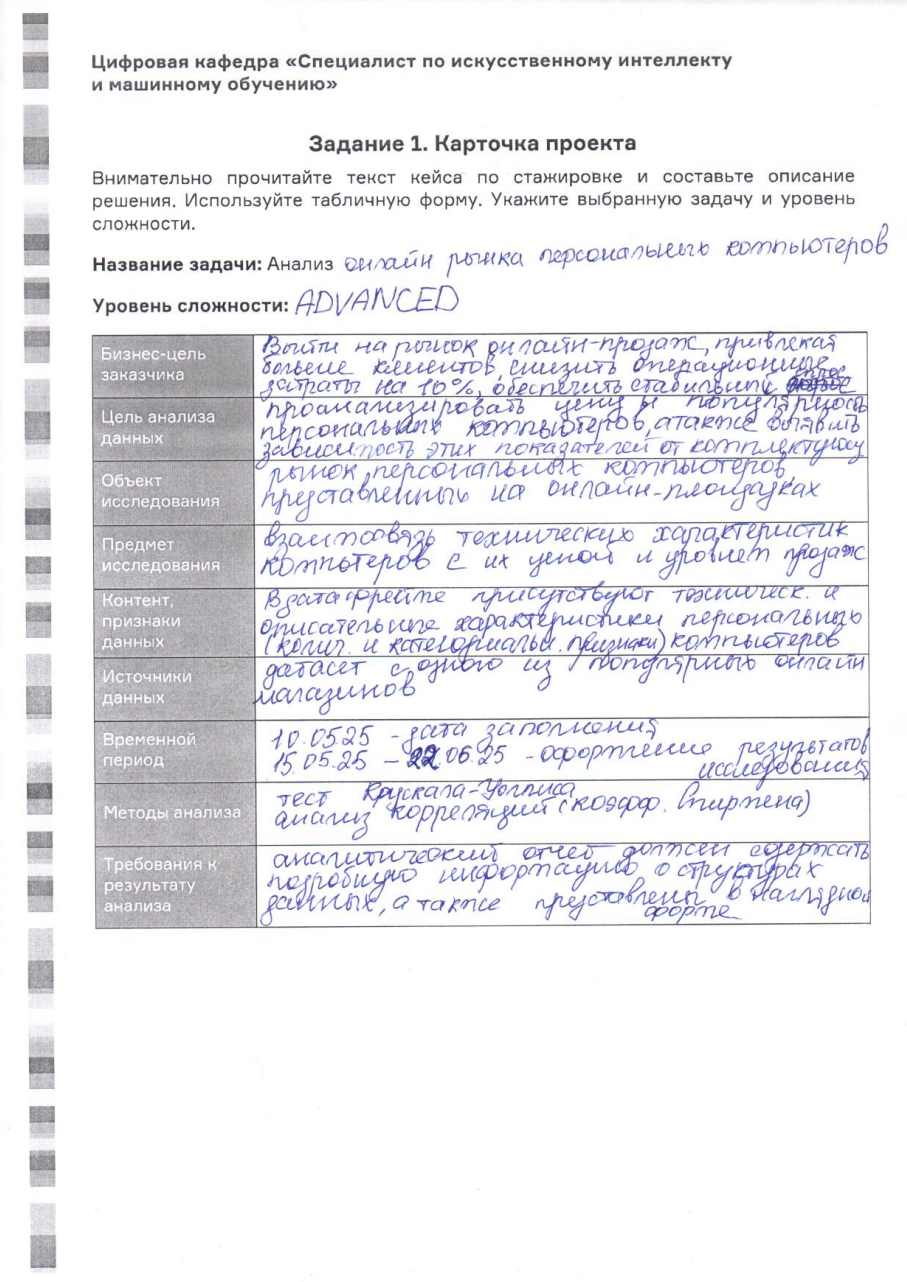

# **Описание кейса**

## Анализ онлайн-рынка персональных компьютеров
К нам обратился клиент, который занимается сборкой и продажей персональных
компьютеров (за исключением мини-ПК и моноблоков). В связи с ростом
популярности интернет-магазинов, таких как Wildberries, Ozon, OnlineTrade и т.п.,
за последние несколько лет, а также с целью привлечения большего числа
клиентов при одновременном снижении затрат на содержание собственного
магазина, доставку и рекламу товаров на 10% он планирует выйти на онлайнрынок в ближайшие 3 месяца. В связи с этим клиент хотел бы узнать, от чего
зависит цена, а также популярность персональных компьютеров, выкладываемых
на онлайн-площадках, чтобы в дальнейшем планировать к сборке востребованные
по техническим характеристикам компьютеры и продавать их по конкурентной
цене.
Специалистом по сбору данных были выгружены датасеты с одного из
популярных онлайн-магазинов, содержащие информацию о товарах категории
«Компьютеры и моноблоки».
Проанализируйте полученные данные и представьте аналитический отчет,
содержащий выводы и рекомендации для Заказчика, которые помогут ему для
решения его бизнес-задач.

## Цель
Необходимо проанализировать цену и популярность (выраженную в
количестве продаж) персональных компьютеров, а также выявить зависимость
этих показателей от комплектующих. А также построить регрессионную
модель для предсказания стоимости компьютеров.

## Исходные данные:
• идентификатор товара (product_id)

• наименование товара (title)

• цена товара в руб. (price)

• количество продаж (sales)

• количество отзывов (feedbacks)

• наименование продавца (seller)

• рейтинг продавца (seller_rating)

• данные о процессоре (Процессор), в т. ч. о типе процессора (Процессор_тип),

• количестве ядер процессора (Количество ядер процессора)

• данные об оперативной памяти (Оперативная память), в т. ч. о типе
оперативной памяти (Тип оперативной памяти), об объеме оперативной
памяти (Объем оперативной памяти (Гб))

• данные об жестком диске (Жесткий диск), в т. ч. об объеме накопителя HDD
(Объем накопителя HDD), об объеме накопителя SSD (Объем накопителя
SSD)

• данные о видеопроцессоре (Видеопроцессор)

• данные об операционной системе (Операционная система)

• данные о гарантийном сроке (Гарантийный срок)

• страна производства (Страна производства)

• данные о габарите товара (Габариты товара), в т. ч. о ширине предмета
(Ширина предмета), о глубине предмета (Глубина предмета), о высоте
предмета (Высота предмета), о весе предмета (Вес без упаковки (кг))

• данные о габарите товара с упаковкой (Габариты товара (с упаковкой)), в т.
ч. длине упаковки (Длина упаковки), о ширине упаковки (Ширина упаковки),

• высоте упаковки (Высота упаковки), о весе предмета с упаковкой (Вес с
упаковкой (кг))

# **Изучение данных**

## Импорт библиотек


In [ ]:
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем библиотеку numpy для возможных расчетов
import numpy as np
# импортируем модуль json для распаковки структур данных формата json
import json
# импортируем статистические библиотеки
import scipy
import scipy.stats as stats
from scipy.stats import skew, kurtosis, shapiro
# импортируем модуль pyplot из библиотеки matplotlib для визуализации
from matplotlib import pyplot as plt
# импортируем библиотеку seaborn для визуализации
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# установить размер графиков
sns.set(rc={'figure.figsize':(8,4)})

## Подгрузка файла

Подгрузка файла составлялась на персональном компьютере в Visual Studio Code (И в collab)

In [ ]:
df = pd.read_csv('wb_pc_hard.csv')

## Обзор датасета

In [ ]:
df.head(60)

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
5,19355097,Игровой Компьютер Robotcomp M-16 V1,55625₽,Купили более 40 раз,12 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
6,19355097,Игровой Компьютер Robotcomp M-16 V1,55625₽,Купили более 40 раз,12 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
7,19358744,Игровой Компьютер Robotcomp Анаконда 2.0 V1,128284₽,Купили более 5 раз,4 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3070,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '21 см', 'Глубина предмета...","{'Длина упаковки': '57 см', 'Ширина упаковки':..."
8,19364495,Игровой Компьютер Robotcomp F22 Raptor V1,48386₽,Купили более 30 раз,9 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i3', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '46 см', 'Ширина упаковки':..."
9,19369504,Офисный Компьютер Robotcomp Босс V1,25393₽,Купили более 10 раз,1 отзыв,Ro

In [ ]:
df.shape

(4500, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

## Выявление проблем

1. Некоторые товары могут не содержать информации по отдельным характеристикам. У некоторых атрибутов отсутствуют продавцы, гарантийный срок, страна производства.
2. Возможно дублирование по product_id или схожим названиям товаров от одного и того же продавца.
3. Столбцы с объемами, размерами и весами могут быть в разном формате. Названия процессоров и видеокарт могут содержать шум.
4. Поля Процессор, Оперативная память, Жесткий диск, Видеопроцессор и др. могут содержать комбинированную информацию в одном столбце. В некоторых случаях указано "'Объем накопителя HDD': None" или "'Процессор_тип': 'Intel Core i5', 'Количество" — такие значения требуют нормализации.
5. В таких столбцах как price и sales необходимо нормализовать значения. Убрать в цене знак валюты ("32900₽") и в продажах убрать "более, раз" ("Купили более 400 раз").
6. Могут присутствовать аномальные значения: 1) Цены, равные нулю или слишком высоким значениям; 2) Продажи с нереалистично высокими или низкими значениями; 3) Размеры и вес товара могут содержать ошибки (отрицательные значения, нереалистичные числа).
7. Есть вероятность наличия в категориях моноблоков (клиента данный продукт не интересует). Требуется проверка и фильтрация.
8. Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных.

# **Предобработка данных**

## Исключение признаков, не представляющих ценности в рамках кейса

In [ ]:
df2 = df.copy()

In [ ]:
columns_to_drop = [
    'title', 'product_id', 'seller',
    'Габариты товара (с упаковкой)', 'Габариты товара',
    'Страна производства'
]

df2.drop(columns=columns_to_drop, inplace=True)


In [ ]:
df2.columns

Index(['price', 'sales', 'feedbacks', 'seller_rating', 'Процессор',
       'Оперативная память', 'Жесткий диск', 'Видеопроцессор',
       'Операционная система', 'Гарантийный срок'],
      dtype='object')

## Нормализация и очистка данных

Убираем символ в цене, чтобы это не помешало в дальнейшем анализе, а также переводим цену в float64

In [ ]:
df2['price'] = df2['price'].astype(str).str.replace('₽', '')


In [ ]:
df2['price'] = pd.to_numeric(df2['price'], errors='coerce')

В sales убираем лишние слова, оставляя только само количество продаж

In [ ]:
import re
def extract_sales(value):
    if pd.isna(value):
        return 0

    match = re.search(r'\d+', str(value))
    if match:
        return int(match.group())
    else:
        return 0

In [ ]:
df2['sales'] = df2['sales'].apply(extract_sales)

In [ ]:
df2['sales'] = pd.to_numeric(df2['sales'], errors='coerce')

В feedbacks аналогично как в sales

In [ ]:
df2['feedbacks'] = df2['feedbacks'].apply(extract_sales)

У некоторых продавцов отсутствует оценка, поэтому было принято решение перевести эти даннные в категориальные. Либо оценки в целом есть (1), либо нет (0)

In [ ]:
df2['has_seller_rating'] = df2['seller_rating'].notna().astype(int)


In [ ]:
df2['seller_rating'] = df2['seller_rating'].fillna(0)


In [ ]:
df2['seller_rating'] = pd.to_numeric(df2['seller_rating'], errors='coerce')

Гарантийный срок перевести в количество дней трудоемко. Было принято решение перевести его тоже в категориальную переменную, либо гарантия есть (1), либо ее нет (0)

In [ ]:
df2['Гарантийный срок'] = df2['Гарантийный срок'].fillna('0')

In [ ]:
df2['Гарантийный срок'].unique()

array(['3года', '0', '3 Года (36 месяцев)', '6 мес.', '6 мес', '3 года',
       '36 мес', '1 (один) год', '36 месяцев', '12 месяцев,', '24 мес',
       '12 месяцев', '12 мес', '1 год', '7 дней', '1 год ( 12 месяцев )',
       '3 мес', '30 дней', '24 месяца', '12 мес.', '2 года', '6 месяцев',
       '36 мес.', '12', '3 месяца', '1', '14 дней', '365; дней',
       '1 год; 12 мес', '1 год; 12 месяцев', '1 месяц', '2 месяца',
       '12 месяцев от King Komp', '12 месяцев от KING KOMP',
       '1 год (12 месяцев)'], dtype=object)

In [ ]:
import re

def warranty_flag(value):
    if pd.isna(value):
        return 0
    text = str(value).strip()
    match = re.search(r'\d+', text)
    if match:
        number = int(match.group())
        if number == 0:
            return 0
        else:
            return 1
    return 0


In [ ]:
df2['Гарантийный срок'] = df2['Гарантийный срок'].apply(warranty_flag)

In [ ]:
df2['Гарантийный срок'].unique()

array([1, 0], dtype=int64)

Следующие категориальные признаки были рассмотрены по ункиальным значениям, а дальше были переведены в один общий вид, чтобы при дальнейшем обучении регрессионной модели не было лишнего шума

In [ ]:
df2['Операционная система'] = df2['Операционная система'].str.strip().str.lower()
os_mapping = {
    'windows 11 pro': 'windows 11',
    'windows 11 home': 'windows 11',
    'windows 11': 'windows 11',
    'windows 10 pro': 'windows 10',
    'windows 10 home': 'windows 10',
    'windows 10': 'windows 10',
    'win 10pro': 'windows 10',
    'window 10 pro trial': 'windows 10 пробная',
    'windows 10 pro trial': 'windows 10 пробная',
    'windows 10 (trial version)': 'windows 10 пробная',
    'windows 10 trial': 'windows 10 пробная',
    'windows 10 пробная': 'windows 10 пробная',
    'windows пробная версия': 'windows пробная',
    'windows пробная': 'windows пробная',
    'windows7/8/10, linux, ubuntu': 'linux',
    'windows 7/8/10, linux, ubuntu': 'linux',
    'windows 7/8/10, linux': 'linux',
    'microsoft windows 11': 'windows 11',
    'windows 10 iot entry': 'windows 10',
    'windows 10 pro; office 2016 home and business': 'windows 10',
    'widows 11 pro': 'windows 11',
    'linux': 'linux',
    'macos': 'macos',
    'dos': 'отсутствует',
    'free dos': 'отсутствует',
    'без oc': 'отсутствует',
    'без os': 'отсутствует',
    'отсутствует': 'отсутствует'
}

df2['Операционная система'] = df2['Операционная система'].replace(os_mapping)

df2['Операционная система'] = df2['Операционная система'].apply(
    lambda x: 'windows пробная' if 'windows' in x and 'trial' in x else x
)
df2['Операционная система'].unique()


array(['отсутствует', 'windows пробная', 'windows 10', 'windows',
       'windows 10 пробная', 'windows 11', 'linux',
       'windows 10 home пробная', 'macos'], dtype=object)

In [ ]:
df2['Видеопроцессор'].unique()

array(['Intel HD Graphics', 'не заполнено', 'Intel UHD Graphics 630',
       'NVIDIA GeForce GTX 1660', 'NVIDIA GeForce GTX 1650',
       'NVIDIA GeForce RTX 3070', 'NVIDIA GeForce RTX 3050',
       'AMD Radeon Vega 7', 'NVIDIA GeForce RTX 3080',
       'AMD Radeon Vega 3', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce GT 1030', 'intel UHD Graphics 750',
       'Intel HD Graphics 6000', 'Intel UHD Graphics 600',
       'Intel HD Graphics 600', 'Intel HD Graphics 610',
       'NVIDIA GeForce GT 730', 'AMD Radeon Vega 8',
       'Intel HD Graphics 630', 'AMD Radeon RX 580',
       'NVIDIA GeForce GTX 1050', 'NVIDIA Quadro T400',
       'NVIDIA GeForce GT 740', 'Intel HD Graphics 530',
       'NVIDIA GeForce RTX 2060', 'Intel UHD Graphics 610',
       'AMD Radeon R5', 'NVIDIA', 'Intel HD Graphics 500',
       'NVIDIA GeForce GTX 1630', 'NVIDIA GeForce GT 610',
       'AMD Radeon RX 550', 'AMD Radeon RX 6500',
       'Intel HD Graphics 2000', 'Intel HD Graphics 4000', 'AMD',
       'In

In [ ]:

def normalize_gpu(gpu):
    if pd.isna(gpu) or gpu.lower() in ['не заполнено', 'без видеокарты', 'none']:
        return 'Нет видеокарты'

    gpu = gpu.lower().strip()

    if 'core i' in gpu or 'процессор' in gpu:
        return 'Нет видеокарты'

    gpu = gpu.replace('nvidia', 'NVIDIA')
    gpu = gpu.replace('amd', 'AMD')
    gpu = gpu.replace('invidia', 'NVIDIA')
    gpu = gpu.replace('nvidia', 'NVIDIA')
    gpu = gpu.replace('nVidia', 'NVIDIA')
    gpu = gpu.replace('vega', 'Vega')
    gpu = gpu.replace('radeon', 'Radeon')
    gpu = gpu.replace('uhd-графика', 'Intel UHD Graphics')
    gpu = gpu.replace('графический процессор', '')

    if 'intel hd' in gpu:
        return 'Intel HD'
    if 'intel uhd' in gpu or 'uhd graphics' in gpu:
        return 'Intel UHD'
    if 'mali' in gpu:
        return 'Mali'
    if 'vega' in gpu:
        match = re.search(r'vega\s*\d+', gpu)
        return 'AMD Vega ' + match.group(0).split()[-1] if match else 'AMD Vega'

    match = re.search(r'(gtx|rtx|gt|rx|r7|r5|hd)\s*[\d\-]+', gpu)
    if match:
        model = match.group(0).upper().replace('-', ' ')
        if 'GTX' in model or 'RTX' in model or 'GT' in model:
            return 'NVIDIA ' + model
        if 'RX' in model or 'R7' in model or 'R5' in model or 'HD' in model:
            return 'AMD ' + model

    if gpu in ['nvidia', 'amd']:
        return 'Нет видеокарты'

    if 'nvidia' in gpu:
        return 'NVIDIA Unknown'
    if 'amd' in gpu:
        return 'AMD Unknown'
    if 'intel' in gpu:
        return 'Intel Unknown'

    return 'Другие'

df2['Видеопроцессор'] = df2['Видеопроцессор'].apply(normalize_gpu)


In [ ]:
df2['Видеопроцессор'].unique()

array(['Intel HD', 'Нет видеокарты', 'Intel UHD', 'NVIDIA GTX 1660',
       'NVIDIA GTX 1650', 'NVIDIA RTX 3070', 'NVIDIA RTX 3050', 'Другие',
       'NVIDIA RTX 3080', 'NVIDIA RTX 3060', 'NVIDIA GT 1030',
       'NVIDIA GT 730', 'AMD RX 580', 'NVIDIA GTX 1050', 'NVIDIA GT 740',
       'NVIDIA RTX 2060', 'NVIDIA GTX 1630', 'NVIDIA GT 610',
       'AMD RX 550', 'AMD RX 6500', 'AMD RX580', 'NVIDIA RTX 1650',
       'AMD RX 6600', 'NVIDIA RTX 4080', 'AMD RX 470', 'AMD RX 460',
       'AMD R7 350', 'NVIDIA RTX 1660', 'NVIDIA GTX 650', 'AMD RX 6700',
       'NVIDIA RTX 4070', 'NVIDIA RTX 1060', 'NVIDIA GTX 1060',
       'AMD RX 570', 'NVIDIA GTX 550', 'NVIDIA GTX 750', 'NVIDIA GTX 950',
       'Mali', 'NVIDIA RTX 2080', 'AMD RX 560', 'Intel Unknown',
       'NVIDIA GTX 970'], dtype=object)

In [ ]:
df2['Процессор'].unique()

array(["{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}",
       "{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': 'не заполнено'}",
       "{'Процессор_тип': 'не заполнено', 'Количество ядер процессора': 'не заполнено'}",
       "{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': '6'}",
       "{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': '10'}",
       "{'Процессор_тип': 'Intel Core i3', 'Количество ядер процессора': '4'}",
       "{'Процессор_тип': 'AMD Ryzen 5', 'Количество ядер процессора': '6'}",
       "{'Процессор_тип': 'AMD Athlon', 'Количество ядер процессора': '2'}",
       "{'Процессор_тип': 'Intel Core i7', 'Количество ядер процессора': '12'}",
       "{'Процессор_тип': 'Intel Core i9', 'Количество ядер процессора': '16'}",
       "{'Процессор_тип': 'AMD Ryzen 3', 'Количество ядер процессора': '2'}",
       "{'Процессор_тип': 'Gemini Lake Refresh J4115', 'Количество ядер процессора': '4'}",
       "{'П

## Распаковка вложенных структур данных

Для следующих данных их необходимо сначала разделить на отдельные столбцы. Это необходимо для хорошей визуализации, анализа, а также безпроблемного обучения модели

In [ ]:
import ast


def split_processor_info(text):
    if pd.isna(text):
        return pd.Series([np.nan, np.nan])

    try:
        data = ast.literal_eval(text)
    except Exception:
        return pd.Series([np.nan, np.nan])

    proc_type = data.get('Процессор_тип', np.nan)
    cores = data.get('Количество ядер процессора', np.nan)

    if cores is None or pd.isna(cores):
        cores_num = np.nan
    else:
        match = re.search(r'(\d+)', str(cores))
        cores_num = int(match.group(1)) if match else np.nan

    return pd.Series([proc_type, cores_num])

df2[['Процессор', 'Количество ядер процессора']] = df2['Процессор'].apply(split_processor_info)


In [ ]:
def normalize_cpu(cpu):
    if pd.isna(cpu) or 'не заполнено' in cpu.lower():
        return 'Нет данных'

    cpu = cpu.lower().strip()

    cpu = re.sub(r'[\d]+[\.\,]*[\d]*\s*ггц', '', cpu)
    cpu = re.sub(r'\b(арт\.?|ghz|ядра?|core|quad|ram|64 бита|dual-core|процессор|встроенный)\b', '', cpu)
    cpu = re.sub(r'[\(\)\[\]\;\:\-]', '', cpu)
    cpu = cpu.replace('intel(r)', 'intel')
    cpu = re.sub(r'\s+', ' ', cpu).strip()

    if 'core i3' in cpu:
        return 'Intel Core i3'
    if 'core i5' in cpu:
        return 'Intel Core i5'
    if 'core i7' in cpu:
        return 'Intel Core i7'
    if 'core i9' in cpu:
        return 'Intel Core i9'
    if 'core 12400f' in cpu or '12400f' in cpu:
        return 'Intel Core i5 12400F'
    if 'xeon' in cpu:
        return 'Intel Xeon'
    if 'pentium' in cpu:
        return 'Intel Pentium'
    if 'celeron' in cpu:
        return 'Intel Celeron'
    if 'atom' in cpu:
        return 'Intel Atom'
    if 'n5095' in cpu:
        return 'Intel N5095'
    if 'n5105' in cpu:
        return 'Intel N5105'
    if 'j4125' in cpu:
        return 'Intel J4125'
    if 'j4115' in cpu:
        return 'Intel J4115'
    if 'j3455' in cpu:
        return 'Intel J3455'
    if 'n3350' in cpu:
        return 'Intel N3350'
    if 'z8350' in cpu:
        return 'Intel Z8350'
    if 'e3' in cpu:
        return 'Intel Xeon E3'
    if 'e5' in cpu:
        return 'Intel Xeon E5'

    if 'ryzen 3' in cpu:
        return 'AMD Ryzen 3'
    if 'ryzen 5' in cpu:
        return 'AMD Ryzen 5'
    if 'ryzen 6' in cpu:
        return 'AMD Ryzen 6'
    if 'ryzen 7' in cpu:
        return 'AMD Ryzen 7'
    if 'ryzen 9' in cpu:
        return 'AMD Ryzen 9'
    if 'ryzen' in cpu:
        return 'AMD Ryzen'

    if 'athlon' in cpu:
        return 'AMD Athlon'
    if 'a12' in cpu:
        return 'AMD A12'
    if 'a6' in cpu:
        return 'AMD A6'
    if 'e1' in cpu:
        return 'AMD E1'
    if 'fx-4300' in cpu:
        return 'AMD FX-4300'
    if 'fx-6100' in cpu:
        return 'AMD FX-6100'
    if 'a10' in cpu:
        return 'AMD A10'
    if 'r9' in cpu:
        return 'AMD Ryzen 9'

    if 'apple m1' in cpu:
        return 'Apple M1'

    if 'cortex' in cpu:
        return 'ARM Cortex'

    if 'intel' in cpu:
        return 'Intel Unknown'
    if 'amd' in cpu:
        return 'AMD Unknown'
    if re.match(r'^q\d+', cpu):
        return 'Intel Core Quad'
    if cpu in ['8 ядер', '4 ядра intel', 'intel 4 ядра']:
        return 'Нет данных'

    return 'Другие'

df2['Процессор'] = df2['Процессор'].apply(normalize_cpu)


In [ ]:
df2['Процессор'].unique()


array(['Intel Celeron', 'Intel Unknown', 'Нет данных', 'AMD Ryzen 5',
       'AMD Athlon', 'AMD Ryzen 3', 'Intel J4115', 'Intel J4125',
       'Intel Core i5 12400F', 'Intel Pentium', 'Intel Xeon', 'Другие',
       'AMD Ryzen 7', 'AMD A6', 'Intel J3455', 'Intel N3350',
       'Intel Atom', 'AMD A12', 'AMD E1', 'Intel N5095', 'AMD Ryzen',
       'Intel Z8350', 'Intel N5105', 'AMD Ryzen 6', 'AMD Ryzen 9',
       'AMD A10', 'AMD Unknown', 'Intel Xeon E5', 'Intel Xeon E3',
       'Intel Core Quad', 'ARM Cortex', 'Apple M1'], dtype=object)

In [ ]:
df2['Количество ядер процессора'] = df2['Количество ядер процессора'].fillna(0).astype(int)

In [ ]:
def split_ram_info(text):
    if pd.isna(text):
        return pd.Series([np.nan, np.nan])

    if isinstance(text, str) and text.strip().startswith('{') and text.strip().endswith('}'):
        try:
            data = ast.literal_eval(text)
            ram_type = data.get('Тип оперативной памяти', np.nan)
            ram_volume = data.get('Объем оперативной памяти (Гб)', None)

            if ram_volume is None or pd.isna(ram_volume):
                ram_volume_num = np.nan
            else:
                match = re.search(r'(\d+)', str(ram_volume))
                ram_volume_num = int(match.group(1)) if match else np.nan

            return pd.Series([ram_type, ram_volume_num])

        except Exception:
            pass

    text = str(text).lower()

    if 'ddr3' in text:
        ram_type = 'DDR3'
    elif 'ddr4' in text:
        ram_type = 'DDR4'
    elif 'ddr5' in text:
        ram_type = 'DDR5'
    elif 'ddr' in text:
        ram_type = 'DDR'
    else:
        ram_type = np.nan

    match = re.search(r'(\d+)', text)
    ram_volume_num = int(match.group(1)) if match else np.nan

    return pd.Series([ram_type, ram_volume_num])


In [ ]:
df2[['Оперативная память', 'Объем оперативной памяти_Гб']] = df2['Оперативная память'].apply(split_ram_info)


In [ ]:
def split_storage_info(text):
    if pd.isna(text):
        return pd.Series([np.nan, np.nan])
    try:
        data = ast.literal_eval(text)
    except Exception:
        return pd.Series([np.nan, np.nan])

    hdd = data.get('Объем накопителя HDD', None)
    ssd = data.get('Объем накопителя SSD', None)

    def extract_gb(value):
        if value is None or pd.isna(value):
            return np.nan
        match = re.search(r'(\d+)', str(value))
        return int(match.group(1)) if match else np.nan

    hdd_gb = extract_gb(hdd)
    ssd_gb = extract_gb(ssd)

    return pd.Series([hdd_gb, ssd_gb])


df2[['Объем HDD Гб', 'Объем SSD Гб']] = df2['Жесткий диск'].apply(split_storage_info)


In [ ]:
df2 = df2.drop(columns=['Жесткий диск'])

df2['Объем HDD Гб'] = df2['Объем HDD Гб'].fillna(0).astype(int)
df2['Объем SSD Гб'] = df2['Объем SSD Гб'].fillna(0).astype(int)

Итоги преобразований

In [ ]:
df2.head()

,price,sales,feedbacks,seller_rating,Процессор,Оперативная память,Видеопроцессор,Операционная система,Гарантийный срок,has_seller_rating,Количество ядер процессора,Объем оперативной памяти_Гб,Объем HDD Гб,Объем SSD Гб
0,10805.0,400,7,0.0,Intel Celeron,DDR 3,Intel HD,отсутствует,1,0,2,4.0,0,0
1,32900.0,0,0,0.0,Intel Unknown,не заполнено,Нет видеокарты,отсутствует,0,0,0,16.0,0,256
2,35720.0,0,0,0.0,Нет данных,не заполнено,Нет видеокарты,отсутствует,0,0,0,16.0,0,512
3,39237.0,10,1,4.7,Intel Unknown,DDR 4,Intel UHD,windows пробная,1,1,6,8.0,0,480
4,76188.0,200,94,4.7,Intel Unknown,DDR 4,NVIDIA GTX 1660,windows пробная,1,1,6,16.0,0,960


In [ ]:
df2['Объем оперативной памяти_Гб'].unique()

array([   4.,   16.,    8.,   32.,    6.,   nan,   64.,    2.,  240.,
       1000.,    1.])

Для оперативной памяти в данных было найдено затруднение. Некоторые данные не фильтровались регулярными выражениями, поэтому было принято решение пройтись по ним еще раз

In [ ]:
df2['Оперативная память'].unique()

array(['DDR 3', 'не заполнено', 'DDR 4', 'DDR', 'DDR 5', 'SODDIM', '4Gb',
       '16', '16 Гб', '4GB', 'RAM 16 ГБ'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np
import re

def clean_ram_fields(row):
    raw_value = str(row['Оперативная память']).lower()
    current_volume = row['Объем оперативной памяти_Гб']
    match = re.search(r'(\d+)', raw_value)
    extracted_volume = int(match.group(1)) if match else np.nan

    if pd.isna(current_volume) and not pd.isna(extracted_volume):
        current_volume = extracted_volume
    type_match = re.search(r'(ddr\s*\d|sodimm|soddim|sodim)', raw_value)
    if type_match:
        ram_type_raw = type_match.group(1).lower().replace(' ', '')
        if 'ddr' in ram_type_raw:
            ram_type = ram_type_raw.upper()
        else:
            ram_type = 'SODIMM'
    else:
        ram_type = np.nan

    return pd.Series([ram_type, current_volume])

df2[['Оперативная память', 'Объем оперативной памяти_Гб']] = df2.apply(clean_ram_fields, axis=1)


In [ ]:
df2['Оперативная память'].unique()

array(['DDR3', nan, 'DDR4', 'DDR5', 'SODIMM'], dtype=object)

In [ ]:
df2['Объем оперативной памяти_Гб'] = df2['Объем оперативной памяти_Гб'].fillna('0')

In [ ]:
df2['Объем оперативной памяти_Гб'] = df2['Объем оперативной памяти_Гб'].astype(int)

## Сегментация данных

Главная проблема датафрейма: большинство моделей не имеют продаж. Заполнять их средним значениями или другими методами не целесообразно. Поэтому было принято решение перевести их категориальный признак, который "низкий", "средний", "высокий"

In [ ]:
bins = [0, 10, 99, float('inf')]
labels = ['Низкие', 'Средние', 'Высокие']

df2['Продажи'] = pd.cut(df2['sales'], bins=bins, labels=labels, right=False)

# Удалим столбец sales
df2 = df2.drop(columns=['sales'])

In [ ]:
df2.dtypes

price                           float64
feedbacks                         int64
seller_rating                   float64
Процессор                        object
Оперативная память               object
Видеопроцессор                   object
Операционная система             object
Гарантийный срок                  int64
has_seller_rating                 int32
Количество ядер процессора        int32
Объем оперативной памяти_Гб       int32
Объем HDD Гб                      int32
Объем SSD Гб                      int32
Продажи                        category
dtype: object

Сохраним отдельно обработанный файл

In [ ]:
df2.to_csv('df2_cleaned_copy.csv', index=False)


**Выводы:**

1. Удаление нерелевантных признаков:
Исключены столбцы, не влияющие на анализ цены и популярности (например, ID товара, габариты, название продавца).

2. Преобразование типов данных:
Столбцы с числовыми значениями, представленными в виде текста (например, «Купили более 400 раз», «7 отзывов»), преобразованы в числовые значения.

3. Пропуски в столбцах с количеством продаж, отзывов и рейтинга продавца заменены на 0.

4. Гарантийный срок переведен в булевый признак — наличие гарантии (1) или её отсутствие (0).

5. Разделение составных признаков:
Столбец с информацией о процессоре разделен на два: тип процессора и количество ядер.
Аналогично, разделены данные по оперативной памяти и накопителям HDD и SSD, где объемы выделены в отдельные числовые столбцы.

6. Обработка пропусков:
В объемах HDD и SSD, а также в количестве ядер и объеме оперативной памяти, пропущенные значения заполнены нулями.

# **Разведочный и статистический анализ**

# Анализ данных

**Этапы анализа:**
1. Определить целевые и факторные переменные.
2. Определить типы переменных.
3. Проанализировать каждый признак отдельно.
4. Проанализировать взаимосвязи признаков.
5. Проинтерпретировать результаты.

**Аналитические цели:**
Необходимо проанализировать цену и популярность (выраженную в
количестве продаж) персональных компьютеров, а также выявить зависимость
этих показателей от комплектующих

## Категориальные переменные
1. Процессор	Модель процессора
2. Оперативная память	Формат или тип RAM (DDR4)
3. Видеопроцессор	Тип/модель видеокарты
4. Операционная система	OS (Windows, Linux)

Уникальных значений: 32
Наиболее частое значение: 'Intel Unknown' — 2702 раз
Процессор
Intel Unknown    2702
Нет данных        589
AMD Ryzen 5       556
AMD Athlon        134
Intel Xeon         90
Name: count, dtype: int64
Наименее встречаемые:
Процессор
AMD E1         1
Intel N3350    1
AMD A10        1
Intel J3455    1
Intel J4115    1
Name: count, dtype: int64


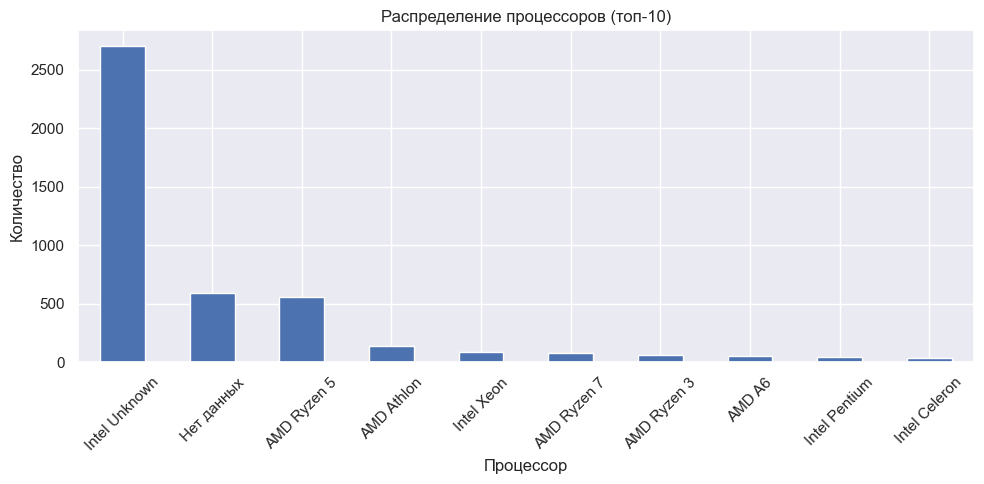

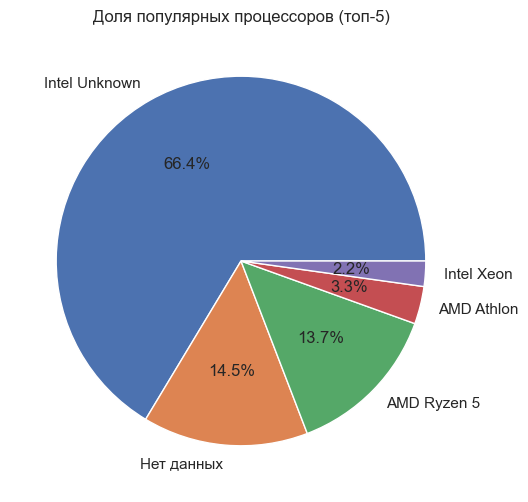

In [ ]:
processor = df2['Процессор']


print(f"Уникальных значений: {processor.nunique()}")


top_value = processor.value_counts().idxmax()
top_count = processor.value_counts().max()
print(f"Наиболее частое значение: '{top_value}' — {top_count} раз")


print(processor.value_counts().head(5))
print("Наименее встречаемые:")
print(processor.value_counts().tail(5))


plt.figure(figsize=(10,5))
processor.value_counts().head(10).plot(kind='bar')
plt.title("Распределение процессоров (топ-10)")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.pie(processor.value_counts().head(5),
        labels=processor.value_counts().head(5).index,
        autopct='%.1f%%')
plt.title("Доля популярных процессоров (топ-5)")
plt.show()


Уникальных значений: 4
Самое частое значение: DDR4, встречается 3502 раз
Оперативная память
DDR4      3502
DDR3       385
DDR5        14
SODIMM       1
Name: count, dtype: int64
Наименее встречаемые:
Оперативная память
DDR4      3502
DDR3       385
DDR5        14
SODIMM       1
Name: count, dtype: int64


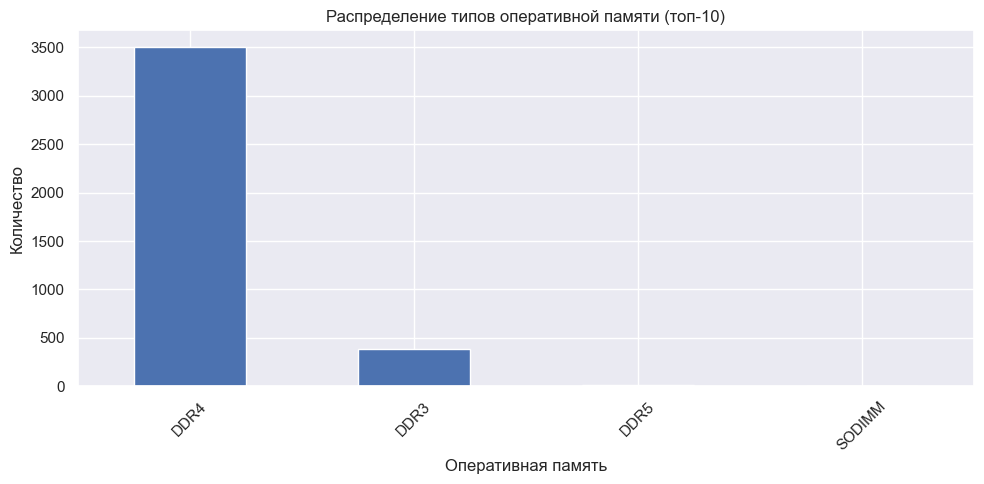

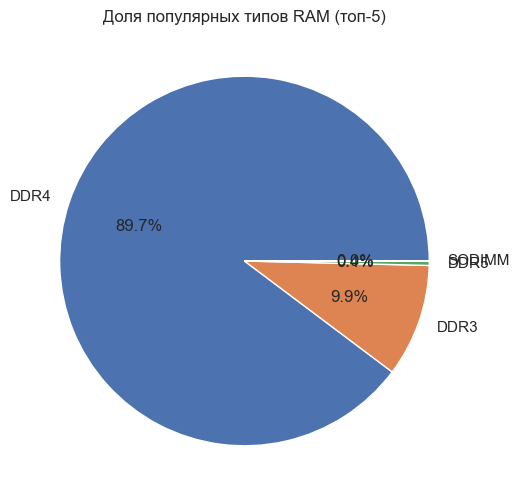

In [ ]:
memory = df2['Оперативная память']
print(f"Уникальных значений: {memory.nunique()}")
print(f"Самое частое значение: {memory.mode()[0]}, встречается {memory.value_counts().iloc[0]} раз")
print(memory.value_counts().head(5))
print("Наименее встречаемые:")
print(memory.value_counts().tail(5))


plt.figure(figsize=(10,5))
memory.value_counts().head(10).plot(kind='bar')
plt.title("Распределение типов оперативной памяти (топ-10)")
plt.xticks(rotation=45)
plt.ylabel("Количество")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.pie(memory.value_counts().head(5),
        labels=memory.value_counts().head(5).index,
        autopct='%.1f%%')
plt.title("Доля популярных типов RAM (топ-5)")
plt.show()


Уникальных значений: 42
Самое частое значение: NVIDIA RTX 3060, встречается 670 раз
Видеопроцессор
NVIDIA RTX 3060    670
Нет видеокарты     626
NVIDIA RTX 3050    504
Другие             463
Intel HD           430
Name: count, dtype: int64
Наименее встречаемые:
Видеопроцессор
NVIDIA RTX 1650    1
Mali               1
AMD R7 350         1
NVIDIA RTX 4080    1
NVIDIA GTX 970     1
Name: count, dtype: int64


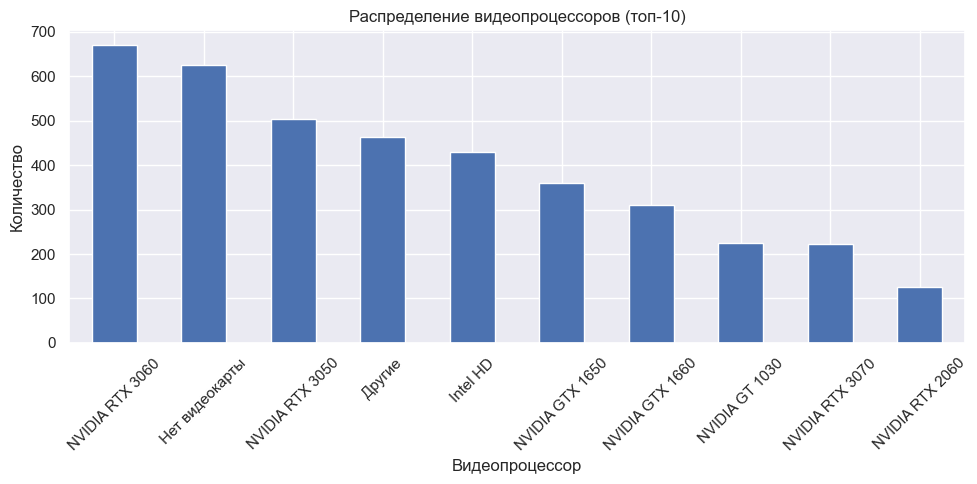

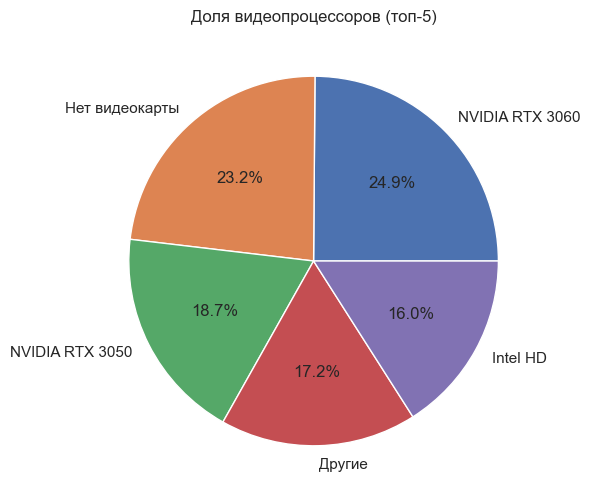

In [ ]:
gpu = df2['Видеопроцессор']
print(f"Уникальных значений: {gpu.nunique()}")
print(f"Самое частое значение: {gpu.mode()[0]}, встречается {gpu.value_counts().iloc[0]} раз")
print(gpu.value_counts().head(5))
print("Наименее встречаемые:")
print(gpu.value_counts().tail(5))

# Графики
plt.figure(figsize=(10,5))
gpu.value_counts().head(10).plot(kind='bar')
plt.title("Распределение видеопроцессоров (топ-10)")
plt.ylabel("Количество")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.pie(gpu.value_counts().head(5),
        labels=gpu.value_counts().head(5).index,
        autopct='%.1f%%')
plt.title("Доля видеопроцессоров (топ-5)")
plt.show()


Уникальных значений: 9
Самое частое значение: windows 10, встречается 2533 раз

Наиболее частые значения:
Операционная система
windows 10            2533
windows 11             808
отсутствует            710
windows пробная        248
windows 10 пробная     133
Name: count, dtype: int64

Наименее встречаемые:
Операционная система
windows 10 пробная         133
windows                     53
macos                        7
linux                        5
windows 10 home пробная      3
Name: count, dtype: int64


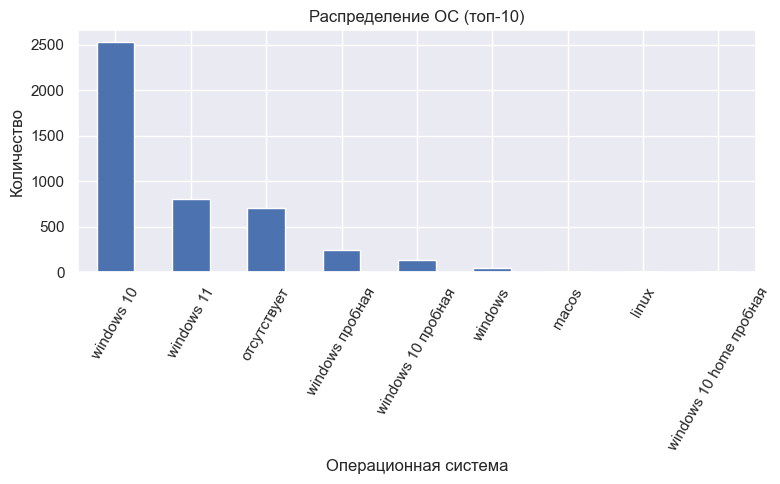

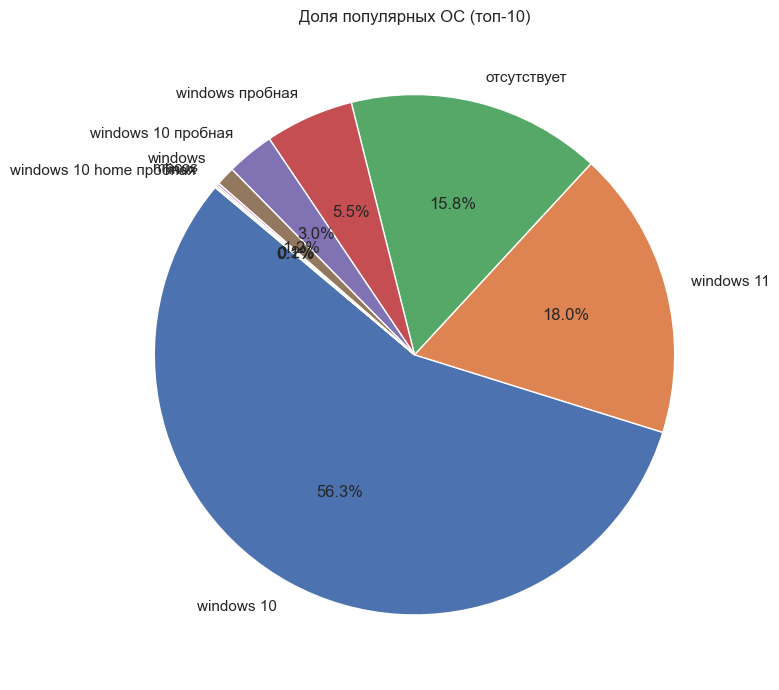

In [ ]:
os = df2['Операционная система']

print(f"Уникальных значений: {os.nunique()}")
print(f"Самое частое значение: {os.mode()[0]}, встречается {os.value_counts().iloc[0]} раз")

print("\nНаиболее частые значения:")
print(os.value_counts().head(5))

print("\nНаименее встречаемые:")
print(os.value_counts().tail(5))

top_os = os.value_counts().head(10)

plt.figure(figsize=(8, 5))
top_os.plot(kind='bar')
plt.title("Распределение ОС (топ-10)")
plt.xticks(rotation=60)
plt.ylabel("Количество")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(top_os,
        labels=top_os.index,
        autopct='%.1f%%',
        startangle=140,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
plt.title("Доля популярных ОС (топ-10)")
plt.tight_layout()
plt.show()


Уникальных значений: 3
Самое частое значение: Низкие, встречается 4171 раз
Продажи
Низкие     4171
Средние     278
Высокие      51
Name: count, dtype: int64
Наименее встречаемые:
Продажи
Низкие     4171
Средние     278
Высокие      51
Name: count, dtype: int64


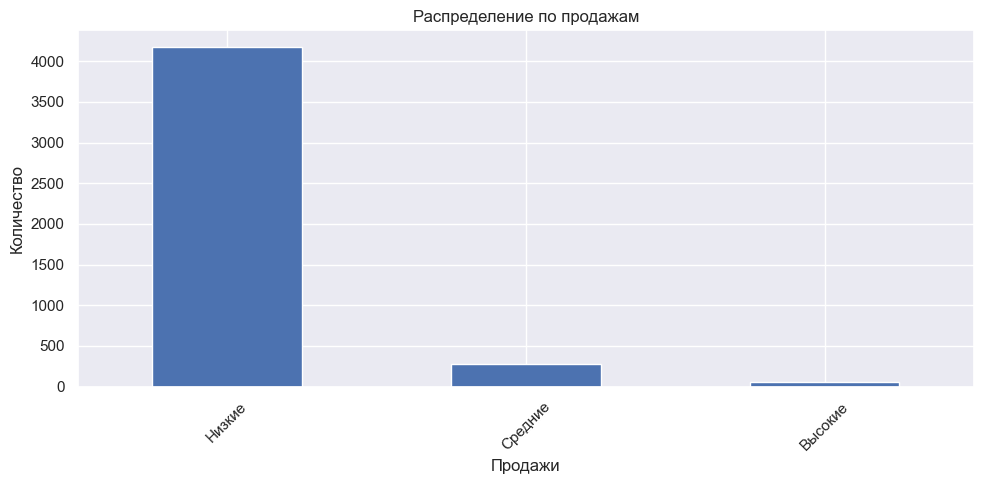

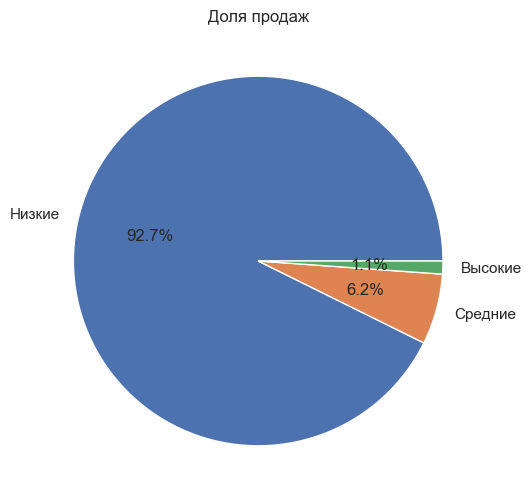

In [ ]:
memory = df2['Продажи']
print(f"Уникальных значений: {memory.nunique()}")
print(f"Самое частое значение: {memory.mode()[0]}, встречается {memory.value_counts().iloc[0]} раз")
print(memory.value_counts().head(5))
print("Наименее встречаемые:")
print(memory.value_counts().tail(5))


plt.figure(figsize=(10,5))
memory.value_counts().head(10).plot(kind='bar')
plt.title("Распределение по продажам")
plt.xticks(rotation=45)
plt.ylabel("Количество")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,6))
plt.pie(memory.value_counts().head(5),
        labels=memory.value_counts().head(5).index,
        autopct='%.1f%%')
plt.title("Доля продаж")
plt.show()


**Выводы:**
1. Почти достаточное количество использует различные процессоры, но чаще всего это Intel Core i5.
2. В выборе операционной памяти пользователи чаще всего используют DDR 4.
3. Среди видеопроцессоров чаще всего пользователи выбирают NVIDIA GeForce RTX 3060.
4. Пользователи используют Windows 10 Pro в большинстве случаев.
5. Продажи у большинства моделей низкие.


## Количественные признаки

              price    feedbacks  seller_rating  Количество ядер процессора  \
count    4499.00000  4500.000000    4500.000000                 4500.000000   
mean    62093.72994     2.772222       3.704511                    5.802444   
std     34584.10655    17.435886       1.806838                    4.007366   
min       132.00000     0.000000       0.000000                    0.000000   
25%     35750.00000     0.000000       4.100000                    4.000000   
50%     62975.00000     0.000000       4.700000                    6.000000   
75%     81239.50000     0.000000       4.700000                    6.000000   
max    235900.00000   296.000000       5.000000                   24.000000   

       Объем оперативной памяти_Гб  Объем HDD Гб  Объем SSD Гб  
count                  4500.000000   4500.000000   4500.000000  
mean                     16.417333    248.362444    476.176444  
std                      18.683488    440.938863    342.981320  
min                       0.

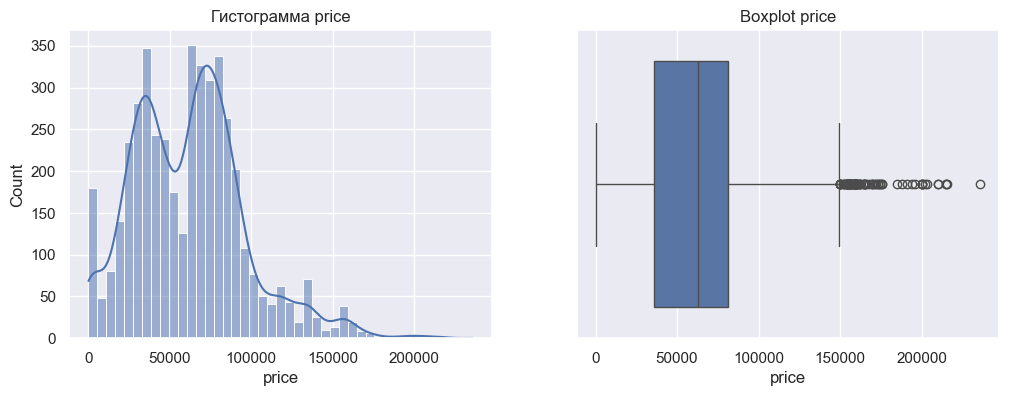

In [ ]:
num_cols = ['price', 'feedbacks', 'seller_rating', 'Количество ядер процессора', 'Объем оперативной памяти_Гб', 'Объем HDD Гб', 'Объем SSD Гб']

print(df2[num_cols].describe())

num_cols = ['price']

for col in num_cols:
    print(f"{col}: skewness={skew(df2[col].dropna())}, kurtosis={kurtosis(df2[col].dropna())}")
    stat, p = shapiro(df2[col].dropna().sample(5000) if len(df2[col]) > 5000 else df2[col].dropna())
    print(f"Shapiro-Wilk test for {col}: stat={stat}, p={p}")

for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df2[col], kde=True)
    plt.title(f'Гистограмма {col}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot {col}')
    plt.show()

In [ ]:
Q1 = df2['price'].quantile(0.25)
Q3 = df2['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df2[(df2['price'] >= lower_bound) & (df2['price'] <= upper_bound)]




               price    feedbacks  seller_rating  Количество ядер процессора  \
count    4398.000000  4398.000000    4398.000000                 4398.000000   
mean    59687.373352     2.827194       3.706708                    5.693724   
std     30950.129629    17.631850       1.803174                    3.961161   
min       132.000000     0.000000       0.000000                    0.000000   
25%     35490.000000     0.000000       4.100000                    4.000000   
50%     62625.000000     0.000000       4.700000                    6.000000   
75%     79380.000000     0.000000       4.700000                    6.000000   
max    149270.000000   296.000000       5.000000                   24.000000   

       Объем оперативной памяти_Гб  Объем HDD Гб  Объем SSD Гб  
count                  4398.000000   4398.000000   4398.000000  
mean                     16.081401    245.478627    472.994543  
std                      18.639859    431.129645    341.048204  
min                

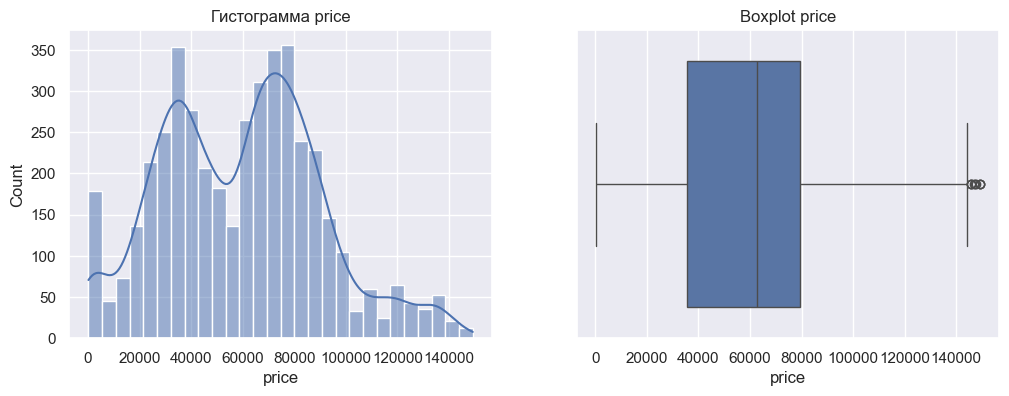

In [ ]:
num_cols = ['price', 'feedbacks', 'seller_rating', 'Количество ядер процессора', 'Объем оперативной памяти_Гб', 'Объем HDD Гб', 'Объем SSD Гб']

print(df_filtered[num_cols].describe())

num_cols = ['price']

for col in num_cols:
    print(f"{col}: skewness={skew(df_filtered[col].dropna())}, kurtosis={kurtosis(df_filtered[col].dropna())}")
    stat, p = shapiro(df_filtered[col].dropna().sample(5000) if len(df2[col]) > 5000 else df_filtered[col].dropna())
    print(f"Shapiro-Wilk test for {col}: stat={stat}, p={p}")

for col in num_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df_filtered[col], kde=True)
    plt.title(f'Гистограмма {col}')
    plt.subplot(1,2,2)
    sns.boxplot(x=df_filtered[col])
    plt.title(f'Boxplot {col}')
    plt.show()


In [ ]:
from scipy.stats import yeojohnson, skew, kurtosis, shapiro

data = df_filtered['price'].dropna()

transformed, lam = yeojohnson(data)

print(f'lambda = {lam}')
print(f'skewness = {skew(transformed):.4f}')
print(f'kurtosis = {kurtosis(transformed):.4f}')

stat, p = shapiro(transformed[:500])
print(f'Shapiro-Wilk test: stat={stat:.4f}, p={p:.4g}')




lambda = 0.7358961597132587
skewness = -0.1623
kurtosis = -0.2266
Shapiro-Wilk test: stat=0.9691, p=9.282e-09


**Выводы:**
1. Минимальные и максимальные значения, размах:
Для признака price минимальное значение — 132, максимальное — 235900. Сильное разнообразие цен на товары.
2. Нулевые значения:
В выборке нулевых значений у price нет — минимальные значения положительные.
3. Средние и медианные значения:
Среднее значение для price  — около 62 тыс., при этом медиана равна 62 975. Это говорит о том, что распределение относительно симметрично, и нет сильных перекосов за счет выбросов в большую сторону.
4. Процентильные значения:
25% объектов имеют цену и продажи ниже 35 750,
50% — ниже 62 975 (медиана),
75% — ниже 81 239,
Максимальные значения сильно выбиваются из общего ряда.
5. Графический анализ:
Гистограммы показывают, что распределение price и sales в целом близко к нормальному, однако присутствуют отдельные высокие значения (выбросы), которые хорошо видны на boxplot — там "усы" выходят далеко вправо. Это может указывать на отдельные очень дорогие
6. Нормальность распределения:
Коэффициенты асимметрии у price, что говорит о лёгкой правосторонней скошенности. Коэффициенты эксцесса отрицательны, что указывает на более плоское распределение, чем нормальное. По тесту Шапиро-Уилка p-значение очень мало, что строго отвергает гипотезу о нормальности. Таким образом, данные не являются строго нормальными, и для анализа лучше использовать непараметрические методы.




## Взаимосвязь количественных признаков


Корреляционная матрица (Пирсон):
                                price  feedbacks  seller_rating  \
price                        1.000000  -0.126445      -0.113222   
feedbacks                   -0.126445   1.000000       0.081157   
seller_rating               -0.113222   0.081157       1.000000   
Количество ядер процессора   0.514373  -0.059075      -0.101571   
Объем оперативной памяти_Гб  0.311435  -0.023302       0.047143   
Объем HDD Гб                 0.271367  -0.056463       0.245245   
Объем SSD Гб                 0.545101  -0.027738      -0.355636   

                             Количество ядер процессора  \
price                                          0.514373   
feedbacks                                     -0.059075   
seller_rating                                 -0.101571   
Количество ядер процессора                     1.000000   
Объем оперативной памяти_Гб                    0.249636   
Объем HDD Гб                                   0.295873   
Объем SSD Гб     

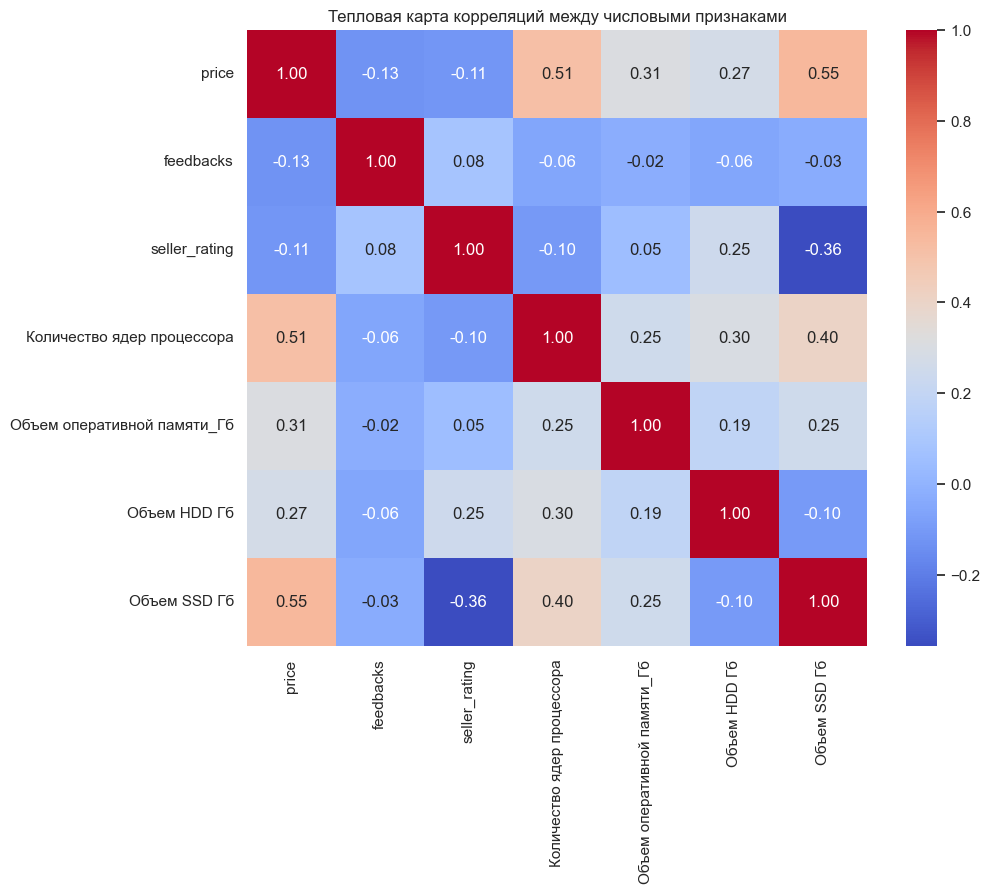

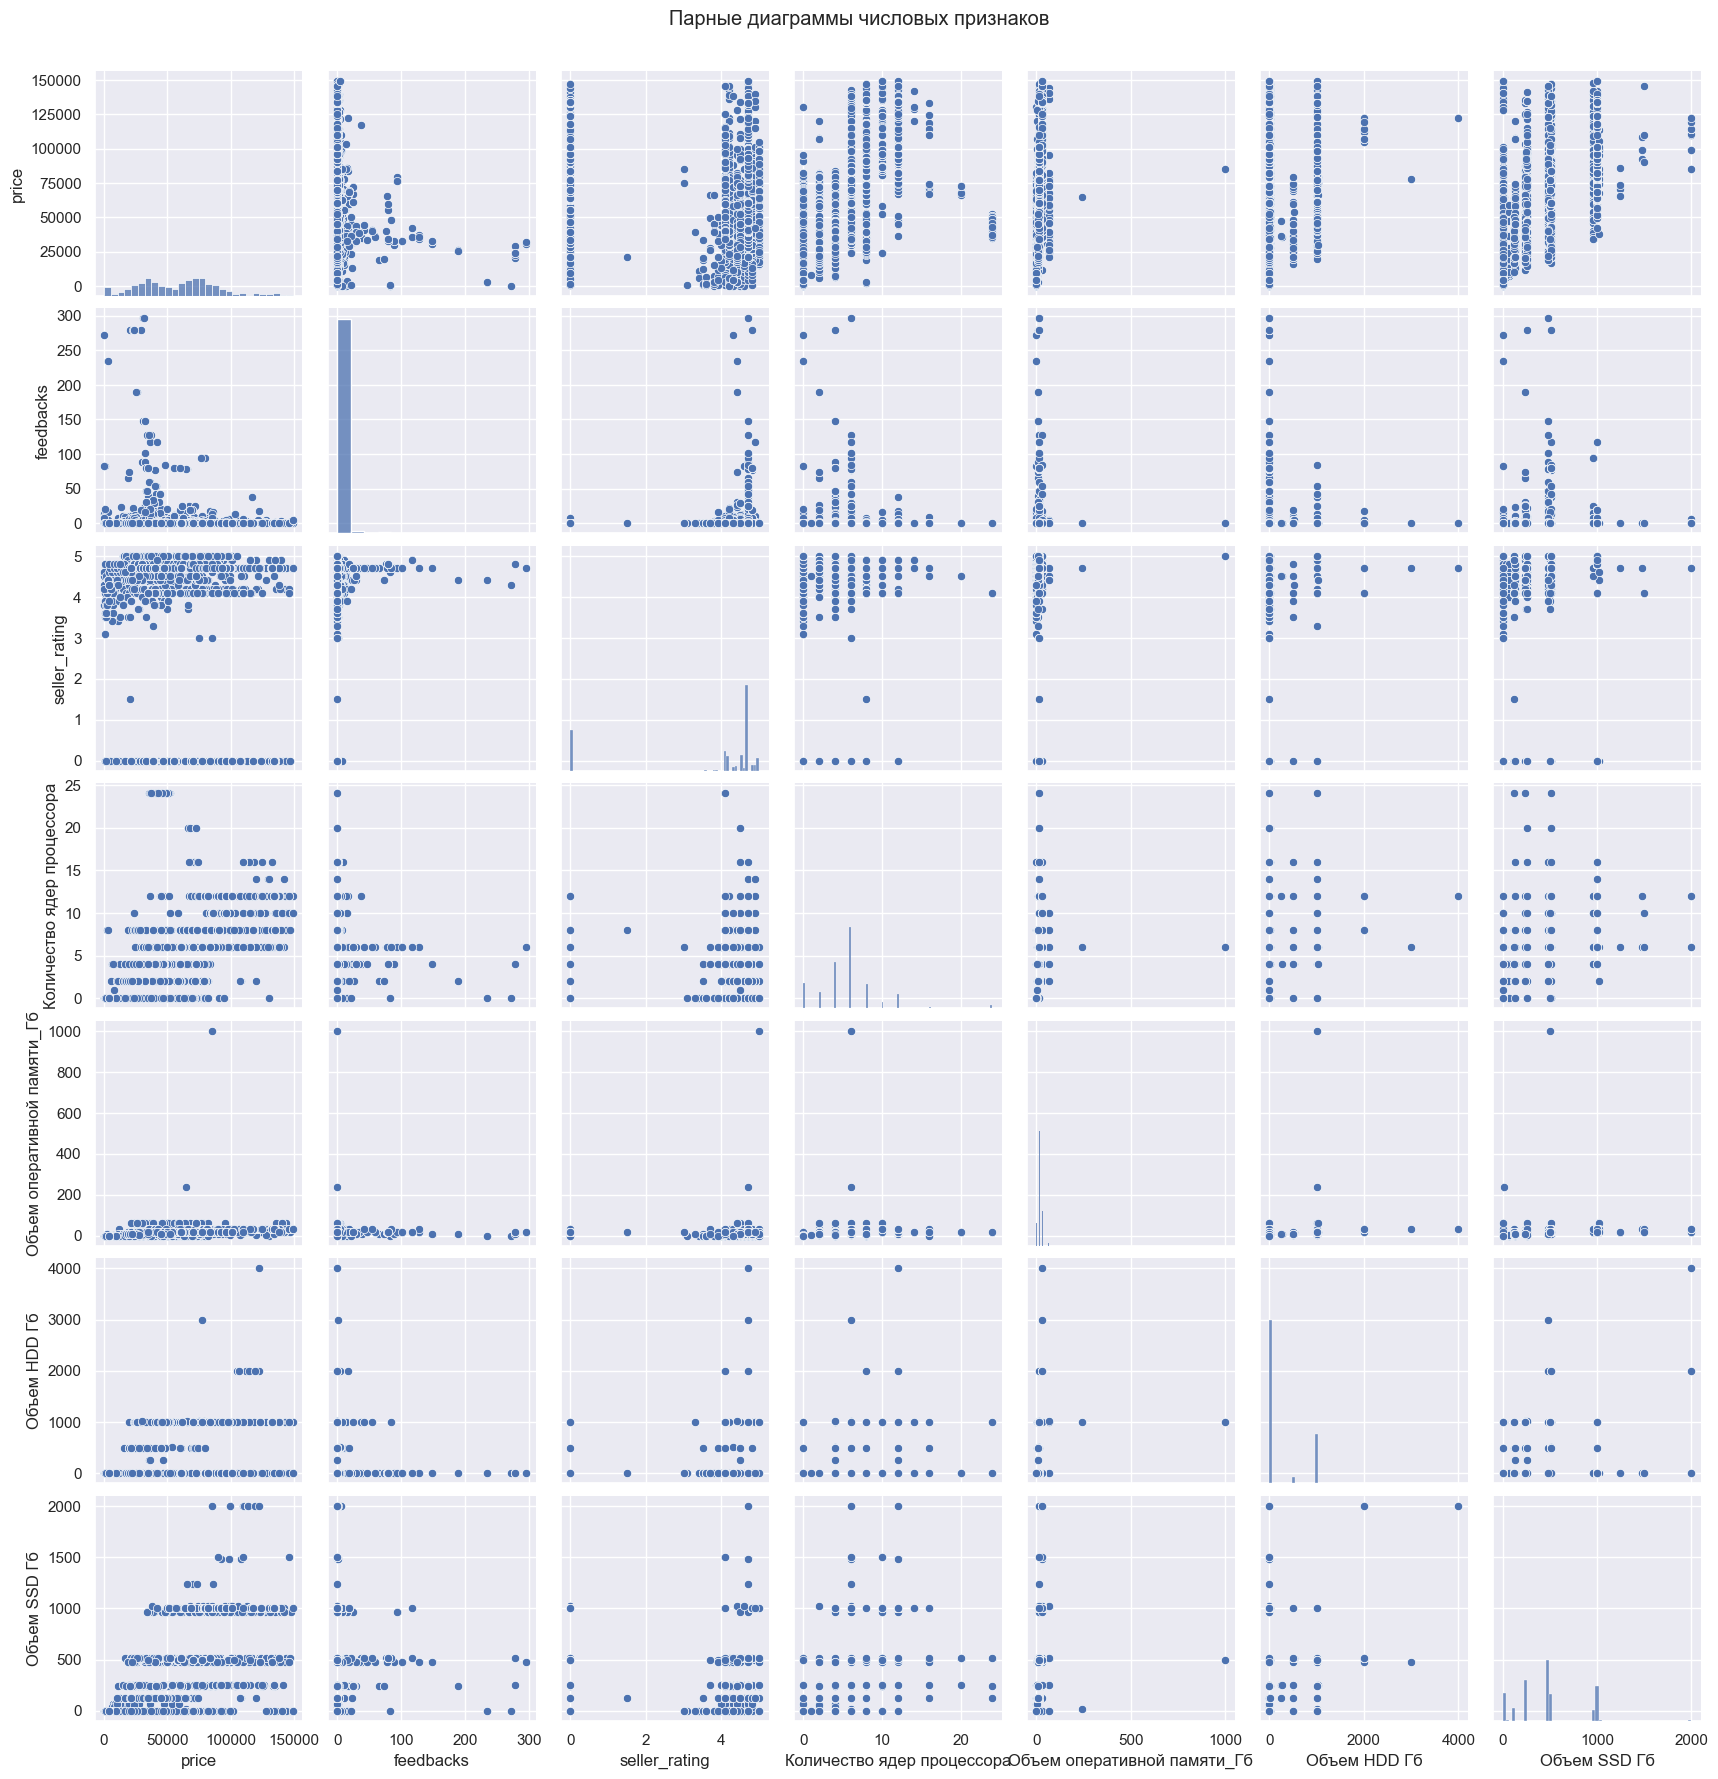

Корреляция между price и feedbacks:
  Pearson: r=-0.126, p=3.865e-17
  Spearman: r=-0.200, p=6.219e-41
Корреляция между price и seller_rating:
  Pearson: r=-0.113, p=5.049e-14
  Spearman: r=0.114, p=3.775e-14
Корреляция между price и Количество ядер процессора:
  Pearson: r=0.514, p=1.033e-295
  Spearman: r=0.663, p=0.000e+00
Корреляция между price и Объем оперативной памяти_Гб:
  Pearson: r=0.311, p=1.573e-99
  Spearman: r=0.610, p=0.000e+00
Корреляция между price и Объем HDD Гб:
  Pearson: r=0.271, p=4.242e-75
  Spearman: r=0.277, p=2.118e-78
Корреляция между price и Объем SSD Гб:
  Pearson: r=0.545, p=0.000e+00
  Spearman: r=0.559, p=0.000e+00
Корреляция между feedbacks и seller_rating:
  Pearson: r=0.081, p=7.065e-08
  Spearman: r=0.158, p=6.686e-26
Корреляция между feedbacks и Количество ядер процессора:
  Pearson: r=-0.059, p=8.855e-05
  Spearman: r=-0.102, p=1.352e-11
Корреляция между feedbacks и Объем оперативной памяти_Гб:
  Pearson: r=-0.023, p=1.223e-01
  Spearman: r=-0.028,

In [ ]:
from scipy.stats import pearsonr, spearmanr

num_cols = ['price', 'feedbacks', 'seller_rating', 'Количество ядер процессора', 'Объем оперативной памяти_Гб', 'Объем HDD Гб', 'Объем SSD Гб']

corr_matrix = df_filtered[num_cols].corr()
print("Корреляционная матрица (Пирсон):")
print(corr_matrix)

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Тепловая карта корреляций между числовыми признаками")
plt.show()

sns.pairplot(df_filtered[num_cols])
plt.suptitle('Парные диаграммы числовых признаков', y=1.02)
plt.show()

for i, col1 in enumerate(num_cols):
    for col2 in num_cols[i+1:]:
        pearson_corr, pearson_p = pearsonr(df_filtered[col1].dropna(), df_filtered[col2].dropna())
        spearman_corr, spearman_p = spearmanr(df_filtered[col1].dropna(), df_filtered[col2].dropna())
        print(f"Корреляция между {col1} и {col2}:")
        print(f"  Pearson: r={pearson_corr:.3f}, p={pearson_p:.3e}")
        print(f"  Spearman: r={spearman_corr:.3f}, p={spearman_p:.3e}")


**Выводы:**
| Признак                     | Pearson | Spearman      | Вывод                                                                                             |
| --------------------------- | ------- | ------------- | ------------------------------------------------------------------------------------------------- |
| **Объем SSD (Гб)**          | 0.545   | 0.559         | Сильнейшая положительная связь с ценой. Чем больше SSD, тем дороже.                               |
| **Количество ядер CPU**     | 0.514   | 0.663         | Сильная и монотонная зависимость — чем больше ядер, тем выше цена.                                |
| **Оперативная память (Гб)** | 0.311   | 0.610         | Спирмен показывает сильную монотонную зависимость — больше RAM, больше цена.                      |
| **Объем HDD (Гб)**          | 0.271   | 0.277         | Слабая положительная связь. HDD всё же влияет, но гораздо меньше, чем SSD.                        |
| **Признаки продаж** | \~-0.13 | -0.20...-0.28 | Слабая отрицательная связь: более дешёвые устройства продаются чаще.                                      |
| **Рейтинг продавца**        | -0.113  | 0.114         | Возможно, рейтинг слегка растёт при росте цены.                                                   |

SSD, CPU и RAM — самые значимые.


| Пара              | Pearson   | Spearman | Вывод                                                                         |
| ----------------- | --------- | -------- | ----------------------------------------------------------------------------- |
| **CPU - SSD**     | 0.404     | 0.590    | Мощный процессор чаще идет с большим SSD.                                     |
| **CPU - RAM**     | 0.250     | 0.637    | Сильная монотонная связь: чем больше ядер, тем больше ОЗУ.                    |
| **RAM - SSD**     | 0.249     | 0.603    | Сильная монотонная связь.                                                     |
| **HDD - SSD**     | -0.100    | -0.094   | Модели с большим SSD чаще без большого HDD.                                   |
| **HDD - CPU/RAM** | \~0.2–0.3 |          | HDD чаще идёт с более мощными конфигурациями, но незначительно.               |

Характеристики тесно между собой связаны — дорогие конфигурации часто получают апгрейд по всем параметрам. SSD и CPU встречаются вместе очень часто.


Рейтинг продавца слабо коррелирует с тех. параметрами. Популярные продавцы продают более массовые, простые устройства.


## Взаимосвязь количественных и категориальных признаков


## Операционная система - price

Средние значения по категориям:
Операционная система
macos                      134292.000000
windows 11                  73720.894073
windows 10 пробная          67039.377953
windows 10                  62769.702110
windows пробная             52603.213992
windows                     42623.641509
windows 10 home пробная     37936.666667
отсутствует                 35465.565156
linux                       26910.200000
Name: price, dtype: float64

Медианы по категориям:
Операционная система
macos                      134292.0
windows 11                  76824.0
windows 10 пробная          66900.0
windows 10                  63956.5
windows пробная             40194.0
windows                     36000.0
windows 10 home пробная     35940.0
отсутствует                 33600.0
linux                       27951.0
Name: price, dtype: float64


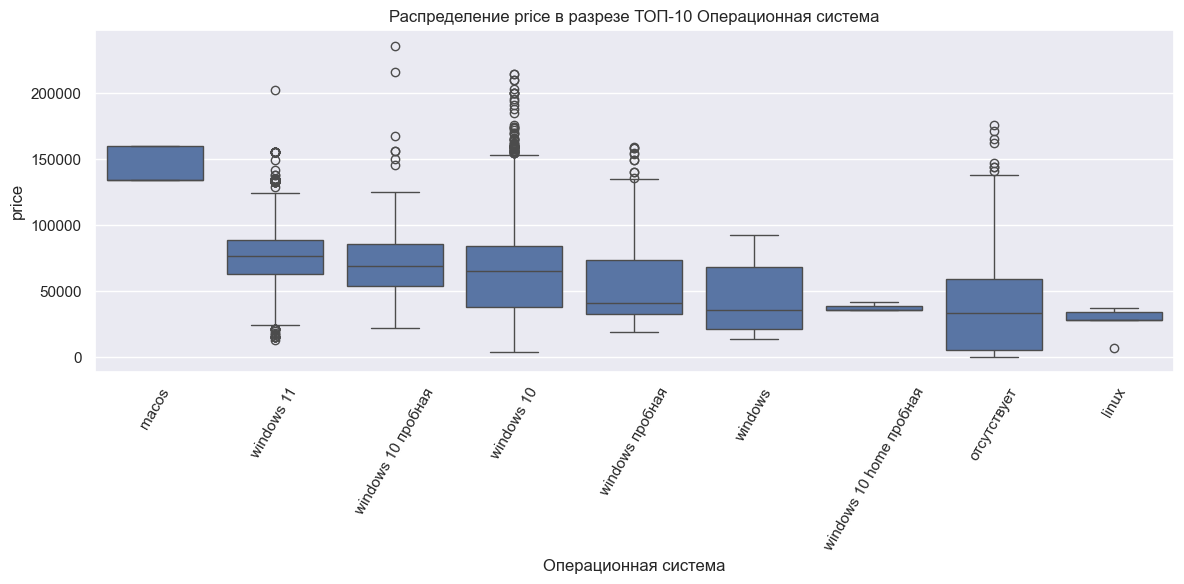


Результаты теста Шапиро-Уилка по категориям:
linux: stat=0.838, p=1.592e-01
macos: stat=1.000, p=1.000e+00
windows: stat=0.901, p=3.525e-04
windows 10: stat=0.975, p=1.883e-20
windows 10 пробная: stat=0.980, p=5.182e-02
windows 11: stat=0.966, p=1.169e-12
windows пробная: stat=0.848, p=1.020e-14
отсутствует: stat=0.915, p=2.071e-19

Тест Крускала-Уоллиса для price в разрезе Операционная система: stat=680.588, p=1.080e-141


c:\Users\Mi\.conda\envs\tensorflow-gpu\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
cat_col = 'Операционная система'
num_col = 'price'

grouped = df_filtered.groupby(cat_col)[num_col]

mean_by_cat = grouped.mean()
median_by_cat = grouped.median()

print("Средние значения по категориям:")
print(mean_by_cat.sort_values(ascending=False))

print("\nМедианы по категориям:")
print(median_by_cat.sort_values(ascending=False))

top_10_cats = mean_by_cat.sort_values(ascending=False).head(10).index.tolist()

df_top10 = df2[df2[cat_col].isin(top_10_cats)]

plt.figure(figsize=(12,6))
sns.boxplot(x=cat_col, y=num_col, data=df_top10, order=top_10_cats)
plt.xticks(rotation=60)
plt.title(f'Распределение {num_col} в разрезе ТОП-10 {cat_col}')
plt.tight_layout()
plt.show()

print("\nРезультаты теста Шапиро-Уилка по категориям:")
for cat_value, group_data in grouped:
    if len(group_data) > 3:
        stat, p = stats.shapiro(group_data.sample(min(len(group_data), 5000)))
        print(f"{cat_value}: stat={stat:.3f}, p={p:.3e}")

groups = [group for name, group in grouped]
stat, p = stats.kruskal(*groups)
print(f"\nТест Крускала-Уоллиса для {num_col} в разрезе {cat_col}: stat={stat:.3f}, p={p:.3e}")


**Анализ взаимосвязи price и Операционная система:**

1. Средние значения цены заметно различаются между категориями ОС. Так, macOS имеет наивысшее среднее значение (~134292), а для большинства Windows-систем среднее колеблется в диапазоне 40000–110000. Это свидетельствует о зависимости цены от типа операционной системы.

2. Тест Шапиро-Уилка показывает, что только для macOS распределение цены можно считать нормальным (p=1.0) и для Free DOS (p=0.36). Для большинства категорий (например, Windows 10, Windows 10 Home, Windows 11 и т.д.) p-значения значительно ниже 0.05, что указывает на отклонение от нормального распределения.

3. Средние цены для macOS и некоторых Windows-версий значительно выше, чем для остальных. Это может говорить о более дорогом сегменте техники с macOS.

4. Тест Крускала-Уоллиса подтверждает статистическую значимость различий между группами по цене (stat=1159.75, p << 0.05). Таким образом, тип операционной системы тесно связан с ценой устройства.

## Оперативная память - price

Средние значения по категориям RAM:
Оперативная память
DDR5      123822.000000
DDR4       67574.014762
SODIMM     37381.000000
DDR3       30441.123288
Name: price, dtype: float64

Медианы по категориям RAM:
Оперативная память
DDR5      120000.0
DDR4       68490.0
SODIMM     37381.0
DDR3       26162.0
Name: price, dtype: float64


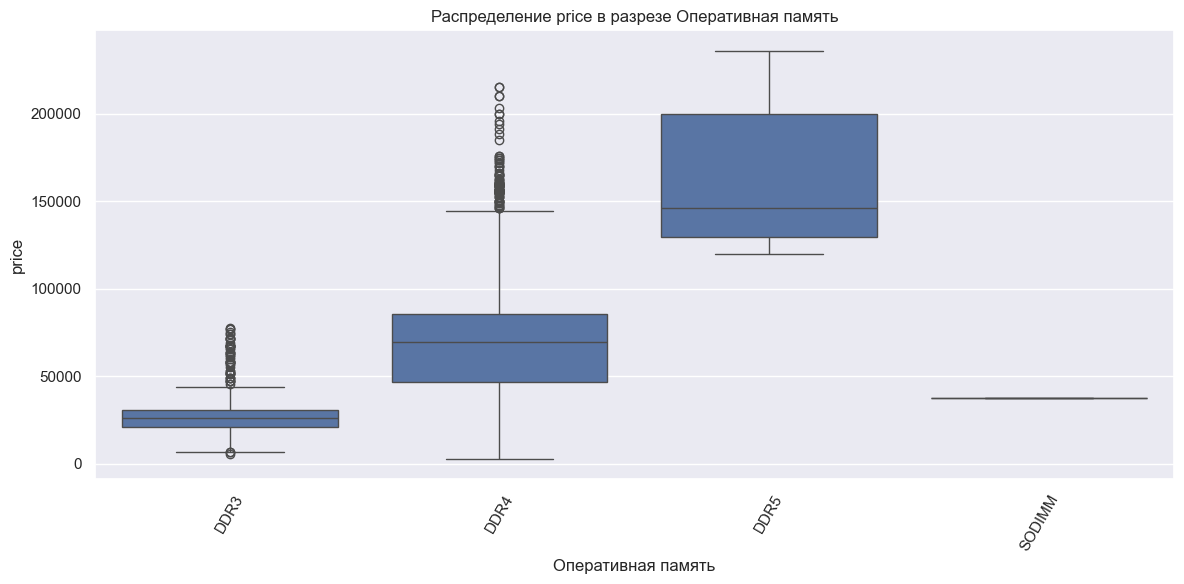


Результаты теста Шапиро-Уилка по категориям RAM:
DDR3 Гб: stat=0.765, p=1.725e-22
DDR4 Гб: stat=0.979, p=6.519e-22
DDR5 Гб: stat=0.712, p=1.260e-02

Тест Крускала-Уоллиса для price в разрезе Оперативная память: stat=654.294, p=1.707e-141


In [ ]:
cat_col = 'Оперативная память'
num_col = 'price'

grouped = df_filtered.groupby(cat_col)[num_col]

mean_by_cat = grouped.mean()
median_by_cat = grouped.median()

print("Средние значения по категориям RAM:")
print(mean_by_cat.sort_values(ascending=False))

print("\nМедианы по категориям RAM:")
print(median_by_cat.sort_values(ascending=False))

plt.figure(figsize=(12,6))
sns.boxplot(x=cat_col, y=num_col, data=df2)
plt.xticks(rotation=60)
plt.title(f'Распределение {num_col} в разрезе {cat_col}')
plt.tight_layout()
plt.show()

print("\nРезультаты теста Шапиро-Уилка по категориям RAM:")
for cat_value, group_data in grouped:
    if len(group_data) > 3:
        sample = group_data.sample(min(len(group_data), 5000), random_state=42)
        stat, p = stats.shapiro(sample)
        print(f"{cat_value} Гб: stat={stat:.3f}, p={p:.3e}")

groups = [group for name, group in grouped]
stat, p = stats.kruskal(*groups)
print(f"\nТест Крускала-Уоллиса для {num_col} в разрезе {cat_col}: stat={stat:.3f}, p={p:.3e}")


**Анализ взаимосвязи price и оперативной памяти:**

1. DDR3 — самый старый тип, используется в бюджетных моделях (средняя цена ~30 тыс. руб.).

2. DDR4 — наиболее распространённый, цена выше (в среднем ~67 тыс. руб.).

3. DDR5 — самый новый и быстрый, используется в дорогих сборках (в среднем ~120 тыс. руб.).

4. Теста Крускала-Уоллиса подтвердил, что различия цен между группами действительно значимы (p-значение ≪ 0.05).

Это означает, что тип оперативной памяти — важный фактор, влияющий на стоимость.

## Объем оперативной памяти - price

Средние значения по категориям RAM:
Объем оперативной памяти_Гб
32      90558.426346
1000    85050.000000
16      65294.505887
240     64720.000000
64      56631.491803
8       40886.602564
4       28453.923567
0       25809.788210
1       20000.000000
6       18679.000000
2       11384.583333
3        5672.000000
Name: price, dtype: float64

Медианы по категориям RAM:
Объем оперативной памяти_Гб
32      90580.0
1000    85050.0
16      67672.0
240     64720.0
64      50671.0
8       36664.0
4       24927.0
0       20852.5
1       20000.0
6       16200.0
2        7659.5
3        5672.0
Name: price, dtype: float64


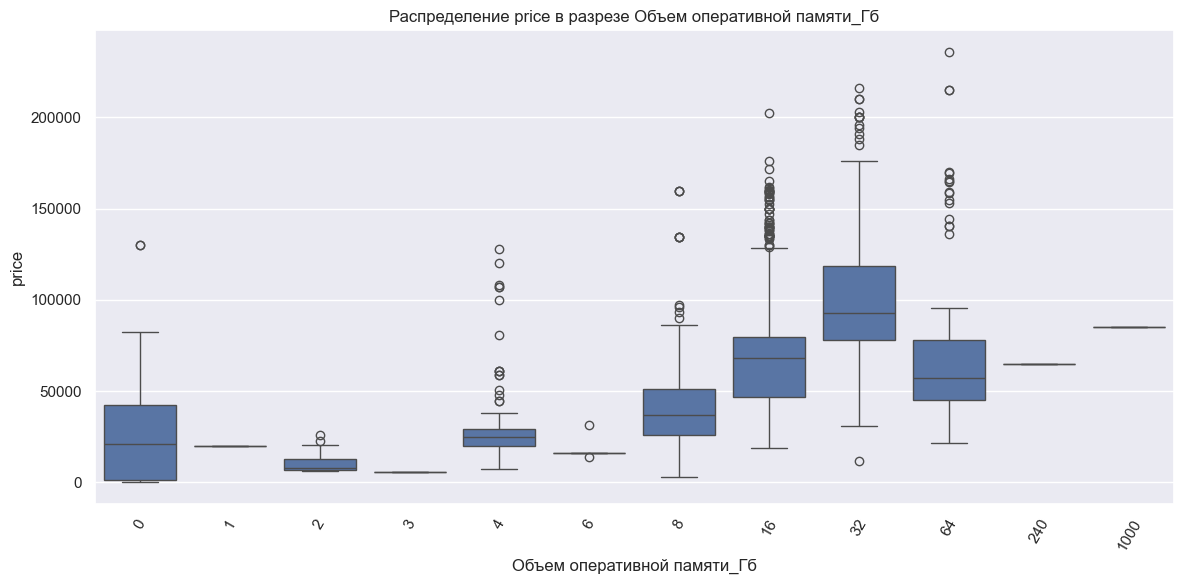


Результаты теста Шапиро-Уилка по категориям RAM:
0 Гб: stat=0.863, p=1.398e-19
2 Гб: stat=0.693, p=7.187e-04
4 Гб: stat=0.638, p=4.359e-18
6 Гб: stat=0.675, p=5.088e-03
8 Гб: stat=0.933, p=3.228e-17
16 Гб: stat=0.970, p=1.688e-21
32 Гб: stat=0.970, p=9.597e-11
64 Гб: stat=0.803, p=1.334e-07

Тест Крускала-Уоллиса для price в разрезе Объем оперативной памяти_Гб: stat=1770.740, p=0.000e+00


In [ ]:
cat_col = 'Объем оперативной памяти_Гб'
num_col = 'price'

grouped = df_filtered.groupby(cat_col)[num_col]

mean_by_cat = grouped.mean()
median_by_cat = grouped.median()

print("Средние значения по категориям RAM:")
print(mean_by_cat.sort_values(ascending=False))

print("\nМедианы по категориям RAM:")
print(median_by_cat.sort_values(ascending=False))

plt.figure(figsize=(12,6))
sns.boxplot(x=cat_col, y=num_col, data=df2)
plt.xticks(rotation=60)
plt.title(f'Распределение {num_col} в разрезе {cat_col}')
plt.tight_layout()
plt.show()

print("\nРезультаты теста Шапиро-Уилка по категориям RAM:")
for cat_value, group_data in grouped:
    if len(group_data) > 3:
        sample = group_data.sample(min(len(group_data), 5000), random_state=42)
        stat, p = stats.shapiro(sample)
        print(f"{cat_value} Гб: stat={stat:.3f}, p={p:.3e}")

groups = [group for name, group in grouped]
stat, p = stats.kruskal(*groups)
print(f"\nТест Крускала-Уоллиса для {num_col} в разрезе {cat_col}: stat={stat:.3f}, p={p:.3e}")


**Анализ взаимосвязи price и объёма оперативной памяти:**

1. Наивысшая средняя цена зафиксирована у ноутбуков с 32 Гб ОЗУ — около 90 558, медиана при этом совпадает и составляет примерно 90 580. Следующая по стоимости категория — с 1000 Гб, средняя и медианная цена — 85 050. Ноутбуки с 16 Гб ОЗУ имеют среднюю цену около 65 295, медиану — 67 672. Категории 240 Гб и 64 Гб занимают следующий уровень — средние цены 64 720 и 56 631 соответственно, при этом медиана для 64 Гб ниже (50 671), что говорит о некоторой асимметрии распределения. В категориях с меньшим объёмом памяти (8, 4, 2 Гб) средние и медианные цены значительно ниже — например, для 8 Гб средняя цена 40 887, медиана — 36 664. Категории с нулевым или очень низким объёмом памяти (0, 1, 2, 6 Гб) имеют самые низкие средние цены (от 11 385 до 26 273) и медианы (от 7 659 до 21 225), что логично, учитывая технические характеристики.


2. Тест Крускала-Уоллиса показал статистически значимую разницу в распределениях цены между группами оперативной памяти (stat=1772.249, p ≈ 0). Это говорит о том, что объём оперативной памяти значительно влияет на цену и различия между группами не случайны.

## Видеопроцессор - price

Средние значения по ТОП-10 видеопроцессорам:
Видеопроцессор
NVIDIA RTX 3080    141881.529412
NVIDIA RTX 3070    125658.531100
NVIDIA RTX 2080    106900.000000
NVIDIA RTX 3060     90432.519461
AMD RX 6700         87540.000000
NVIDIA RTX 3050     77524.851190
NVIDIA RTX 2060     74790.385827
AMD RX 6600         74354.000000
AMD RX580           73600.000000
NVIDIA GTX 950      71780.000000
Name: price, dtype: float64

Медианы по ТОП-10 видеопроцессорам:
Видеопроцессор
NVIDIA RTX 3080    140995.0
NVIDIA RTX 3070    124164.0
NVIDIA RTX 2080    106900.0
NVIDIA RTX 3060     88110.0
AMD RX 6700         85500.0
AMD RX 6600         75400.0
NVIDIA RTX 3050     74872.0
AMD RX580           73600.0
NVIDIA RTX 2060     72900.0
NVIDIA GTX 950      71360.0
Name: price, dtype: float64


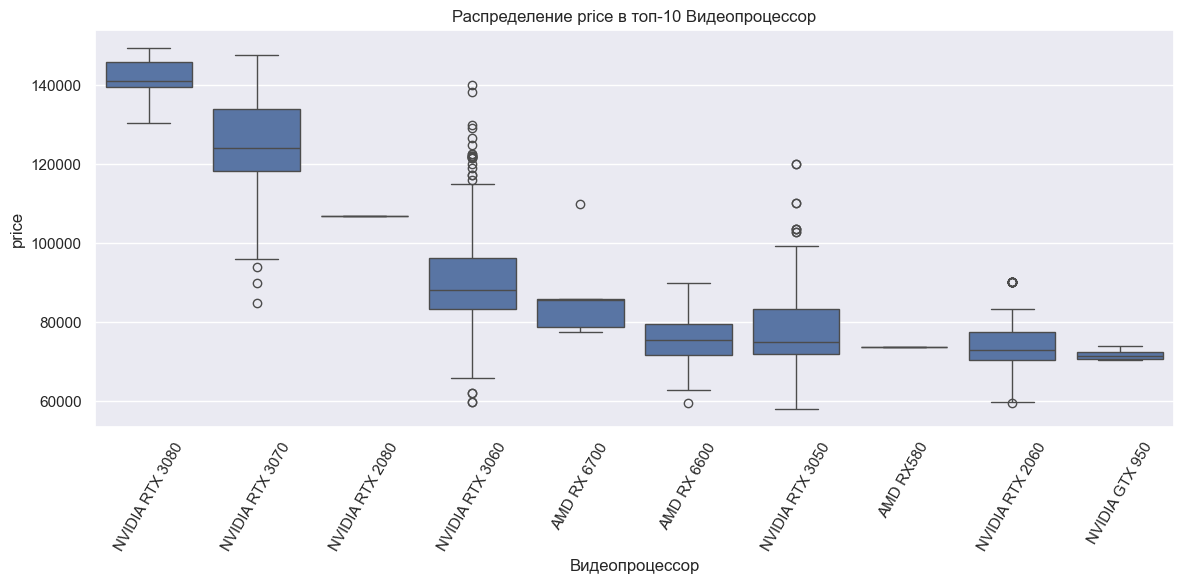


Результаты теста Шапиро-Уилка по топ-10 категориям:
AMD RX 6600: stat=0.935, p=3.615e-01
AMD RX 6700: stat=0.791, p=6.767e-02
NVIDIA GTX 950: stat=0.906, p=4.612e-01
NVIDIA RTX 2060: stat=0.909, p=3.162e-07
NVIDIA RTX 3050: stat=0.945, p=1.102e-12
NVIDIA RTX 3060: stat=0.944, p=3.084e-15
NVIDIA RTX 3070: stat=0.944, p=2.978e-07
NVIDIA RTX 3080: stat=0.948, p=4.234e-01

Тест Крускала-Уоллиса для ТОП-10: stat=893.354, p=1.307e-188


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

cat_col = 'Видеопроцессор'
num_col = 'price'

grouped = df_filtered.groupby(cat_col)[num_col]
median_by_cat = grouped.median()

top_10_cats = median_by_cat.sort_values(ascending=False).head(10).index.tolist()

df_top = df_filtered[df_filtered[cat_col].isin(top_10_cats)]

grouped_top = df_top.groupby(cat_col)[num_col]
mean_by_top = grouped_top.mean()
median_by_top = grouped_top.median()

print("Средние значения по ТОП-10 видеопроцессорам:")
print(mean_by_top.sort_values(ascending=False))

print("\nМедианы по ТОП-10 видеопроцессорам:")
print(median_by_top.sort_values(ascending=False))

plt.figure(figsize=(12,6))
sns.boxplot(x=cat_col, y=num_col, data=df_top, order=median_by_top.sort_values(ascending=False).index)
plt.xticks(rotation=60)
plt.title(f'Распределение {num_col} в топ-10 {cat_col}')
plt.tight_layout()
plt.show()

print("\nРезультаты теста Шапиро-Уилка по топ-10 категориям:")
for cat_value, group_data in grouped_top:
    if len(group_data) > 3:
        sample = group_data.sample(min(len(group_data), 5000), random_state=42)
        stat, p = stats.shapiro(sample)
        print(f"{cat_value}: stat={stat:.3f}, p={p:.3e}")

groups_top = [group for _, group in grouped_top if len(group) > 3]
if len(groups_top) >= 2:
    stat, p = stats.kruskal(*groups_top)
    print(f"\nТест Крускала-Уоллиса для ТОП-10: stat={stat:.3f}, p={p:.3e}")
else:
    print("Недостаточно групп для выполнения теста Крускала–Уоллиса.")


**Анализ взаимосвязи:**

1. Самые дорогие видеокарты как по среднему значению, так и по медиане — это NVIDIA GeForce RTX 3080 и RTX 3070, со средней ценой выше 140 тыс. руб.
2. В список вошли и более бюджетные видеокарты, такие как NVIDIA GeForce RTX 3050 и AMD Radeon RX 6600, с медианными ценами около 75 тыс. руб.
3. Медианы варьируются от 74 тыс. до 141 тыс. руб., сглаживая выбросы, которые могли завысить средние значения (например, у intel UHD Graphics 750 средняя ≈111 тыс., а медиана выше — 118 тыс.).
4. Тест Крускала–Уоллиса показал крайне низкое p-значение: stat=811.395, p=6.449e-171, что говорит о статистически значимых различиях в ценах между видеокартами из ТОП-10.

## Процессор - price

Средние значения по ТОП-10 процессорам:
Процессор
Apple M1                134292.000000
AMD Ryzen 9             124900.000000
AMD Ryzen 7              98662.460526
Intel Core i5 12400F     85329.833333
Intel Unknown            69241.707233
Intel Xeon E5            64816.666667
AMD Ryzen 5              59167.162162
AMD Unknown              58925.000000
Intel Xeon E3            53000.000000
AMD A12                  49677.333333
Name: price, dtype: float64

Медианы по ТОП-10 процессорам:
Процессор
Apple M1                134292.0
AMD Ryzen 9             124900.0
AMD Ryzen 7              94080.0
Intel Core i5 12400F     85177.0
Intel Unknown            71007.0
Intel Xeon E5            68800.0
AMD Ryzen 5              62625.0
AMD Unknown              51150.0
AMD A12                  50400.0
Intel Xeon E3            50400.0
Name: price, dtype: float64


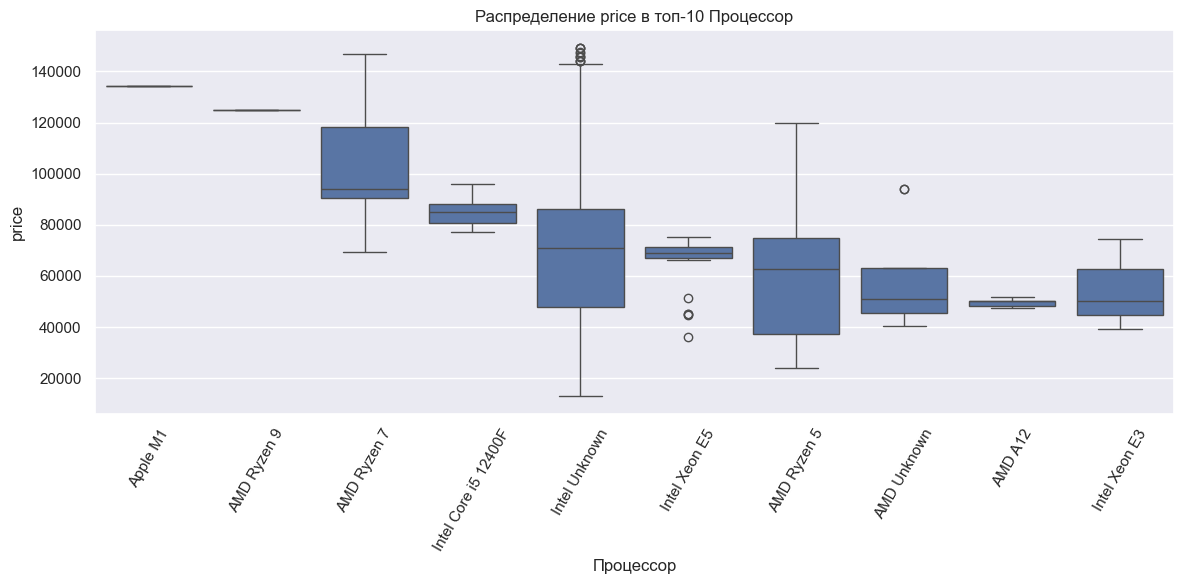


Результаты теста Шапиро-Уилка по топ-10 процессорам:
AMD A12: stat=0.827, p=1.006e-01
AMD Ryzen 5: stat=0.932, p=3.176e-15
AMD Ryzen 7: stat=0.843, p=1.689e-07
AMD Unknown: stat=0.738, p=5.950e-03
Apple M1: stat=1.000, p=1.000e+00
Intel Core i5 12400F: stat=0.957, p=7.988e-01
Intel Unknown: stat=0.976, p=1.273e-20
Intel Xeon E3: stat=0.855, p=2.616e-02
Intel Xeon E5: stat=0.736, p=3.171e-05

Тест Крускала-Уоллиса для ТОП-10 процессоров: stat=181.135, p=5.946e-35


c:\Users\Mi\.conda\envs\tensorflow-gpu\lib\site-packages\scipy\stats\_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [ ]:
cat_col = 'Процессор'
num_col = 'price'

grouped = df_filtered.groupby(cat_col)[num_col]
median_by_cat = grouped.median()
top_10_cats = median_by_cat.sort_values(ascending=False).head(10).index.tolist()

df_top = df_filtered[df_filtered[cat_col].isin(top_10_cats)]
grouped_top = df_top.groupby(cat_col)[num_col]
mean_by_top = grouped_top.mean()
median_by_top = grouped_top.median()

print("Средние значения по ТОП-10 процессорам:")
print(mean_by_top.sort_values(ascending=False))

print("\nМедианы по ТОП-10 процессорам:")
print(median_by_top.sort_values(ascending=False))

plt.figure(figsize=(12,6))
sns.boxplot(x=cat_col, y=num_col, data=df_top, order=median_by_top.sort_values(ascending=False).index)
plt.xticks(rotation=60)
plt.title(f'Распределение {num_col} в топ-10 {cat_col}')
plt.tight_layout()
plt.show()

print("\nРезультаты теста Шапиро-Уилка по топ-10 процессорам:")
for cat_value, group_data in grouped_top:
    if len(group_data) > 3:
        sample = group_data.sample(min(len(group_data), 5000), random_state=42)
        stat, p = stats.shapiro(sample)
        print(f"{cat_value}: stat={stat:.3f}, p={p:.3e}")

groups_top = [group for _, group in grouped_top if len(group) > 3]
if len(groups_top) >= 2:
    stat, p = stats.kruskal(*groups_top)
    print(f"\nТест Крускала-Уоллиса для ТОП-10 процессоров: stat={stat:.3f}, p={p:.3e}")
else:
    print("Недостаточно групп для выполнения теста Крускала–Уоллиса.")

**Анализ взаимосвязи**
1. Apple M1 занимает лидирующую позицию как по средней цене (134 292 руб.), так и по медиане. Также в верхней части рейтинга находятся AMD Ryzen 9 (124 900 руб.) и Intel Core i9 (≈118 430 руб.), что отражает их позиционирование как высокопроизводительных решений.

2. Для большинства процессоров медианы близки к средним, что говорит о умеренном уровне выбросов.Однако, у некоторых наблюдаются расхождения — например, у Intel Core i7 средняя ≈88 038, а медиана чуть выше — 90 153 руб., что может указывать на асимметрию распределения.

3. Крускал–Уоллис тест показал статистически значимые различия между медианами цен процессоров: stat = 23.799, p = 8.762e-05, что указывает на то, что хотя бы одна группа отличается от других по распределению цен.


## Взаимосвязь категориальных признаков



=== Процессор vs Продажи ===

Таблица сопряженности:
Продажи               Низкие  Средние  Высокие
Процессор                                     
AMD A10                    1        0        0
AMD A12                    6        0        0
AMD A6                    40       11        1
AMD Athlon               122       10        2
AMD E1                     0        1        0
AMD Ryzen                  0        1        1
AMD Ryzen 3               59        1        0
AMD Ryzen 5              504       39       12
AMD Ryzen 6                2        0        0
AMD Ryzen 7               76        0        0
AMD Ryzen 9                1        0        0
AMD Unknown                8        0        0
ARM Cortex                 2        0        0
Apple M1                   4        0        0
Intel Atom                 7        1        0
Intel Celeron             22        7        2
Intel Core Quad            4        0        0
Intel Core i5 12400F       6        0        0
Intel 

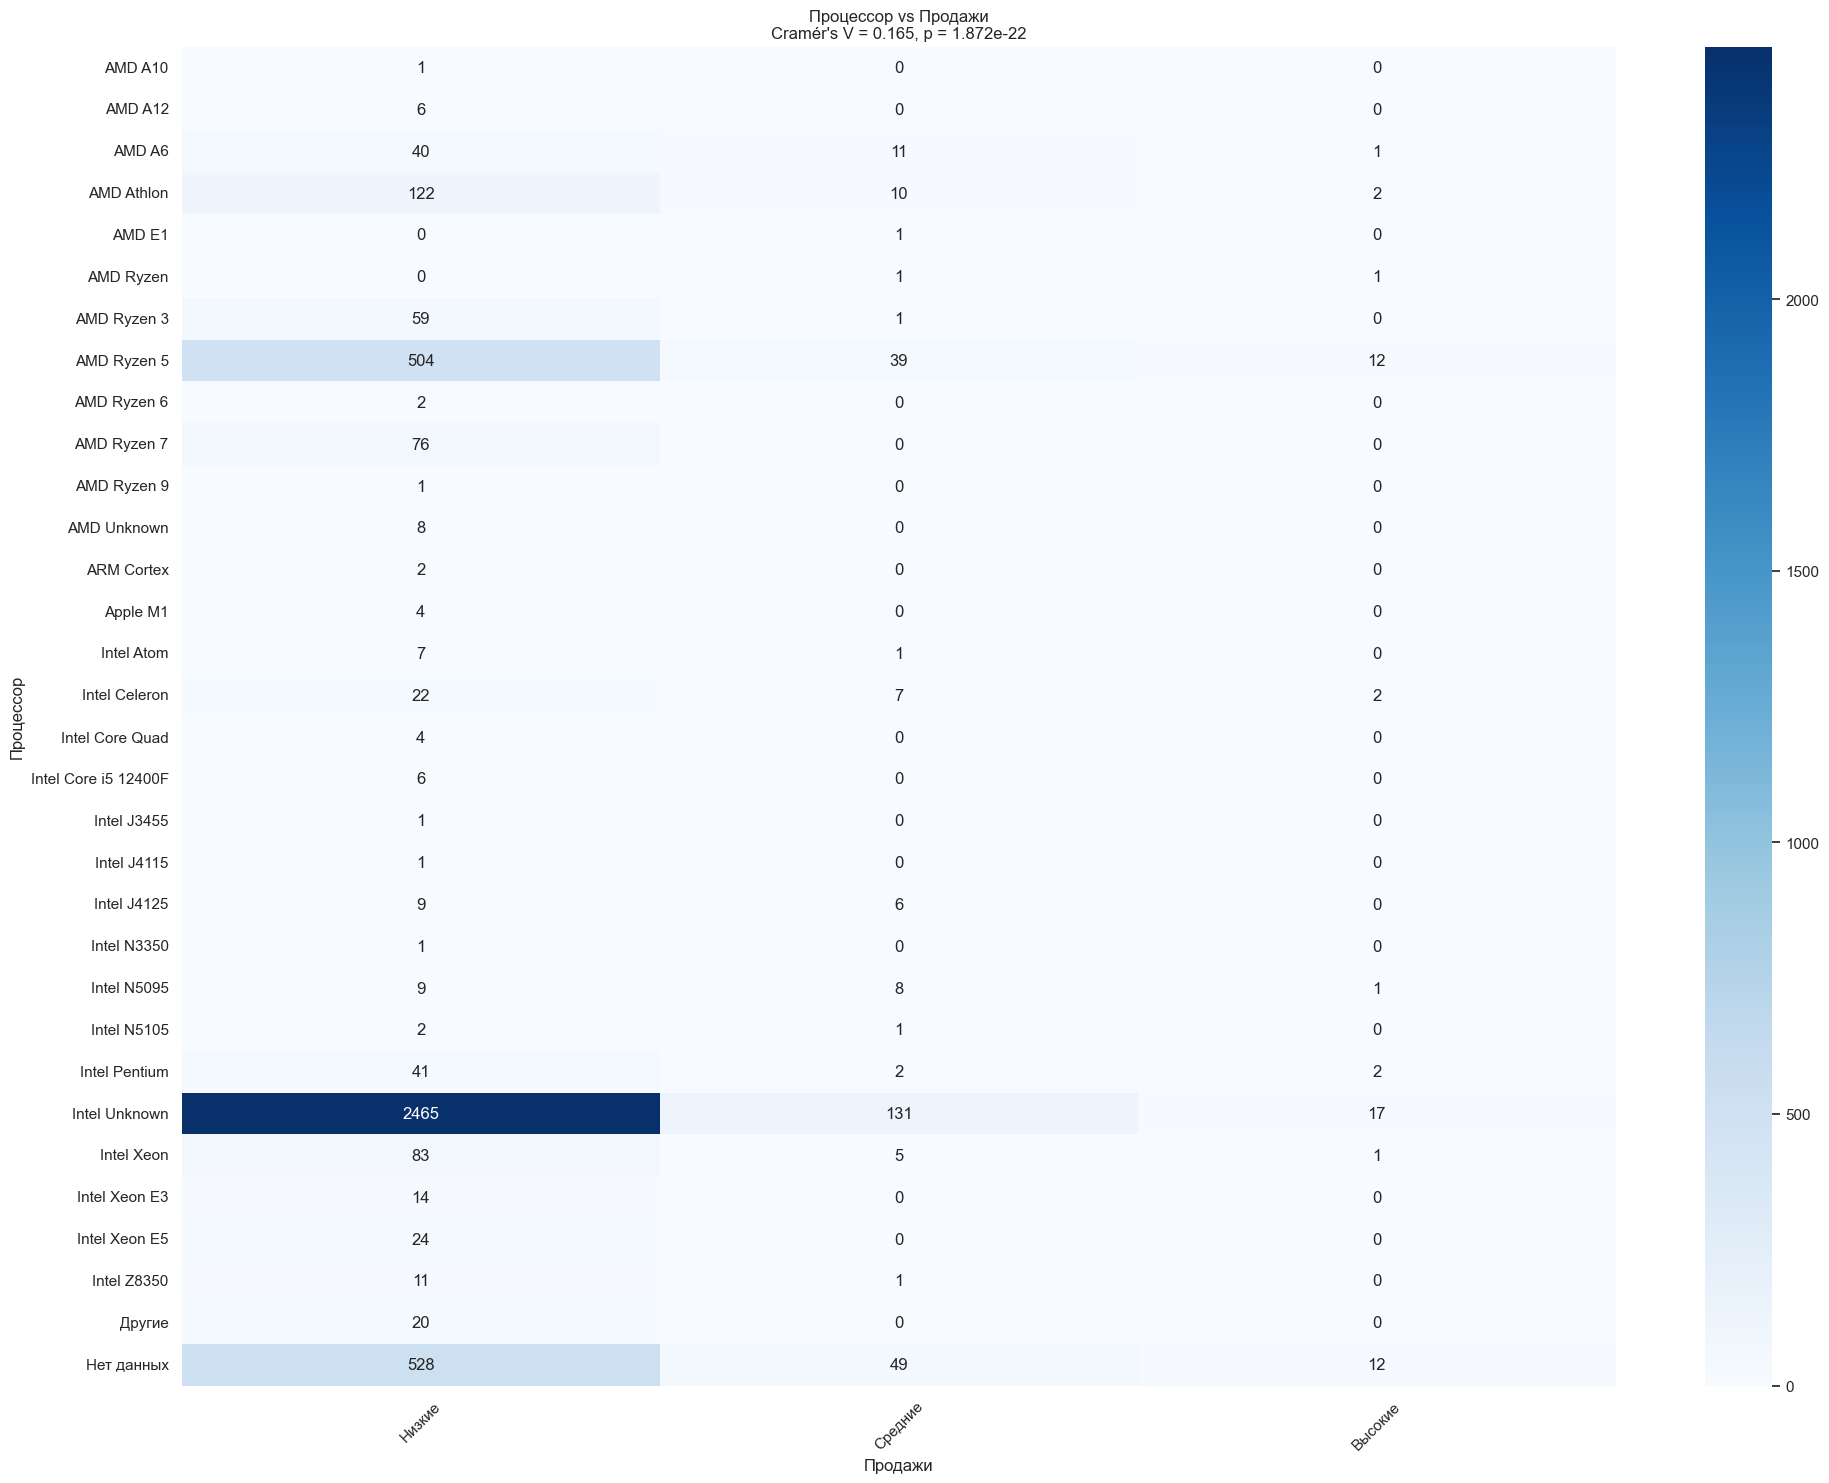


=== Оперативная память vs Продажи ===

Таблица сопряженности:
Продажи             Низкие  Средние  Высокие
Оперативная память                          
DDR3                   345       31        8
DDR4                  3190      190       31
DDR5                     7        0        0
SODIMM                   1        0        0

χ² = 9.452, p = 1.497e-01, Cramér's V = 0.035


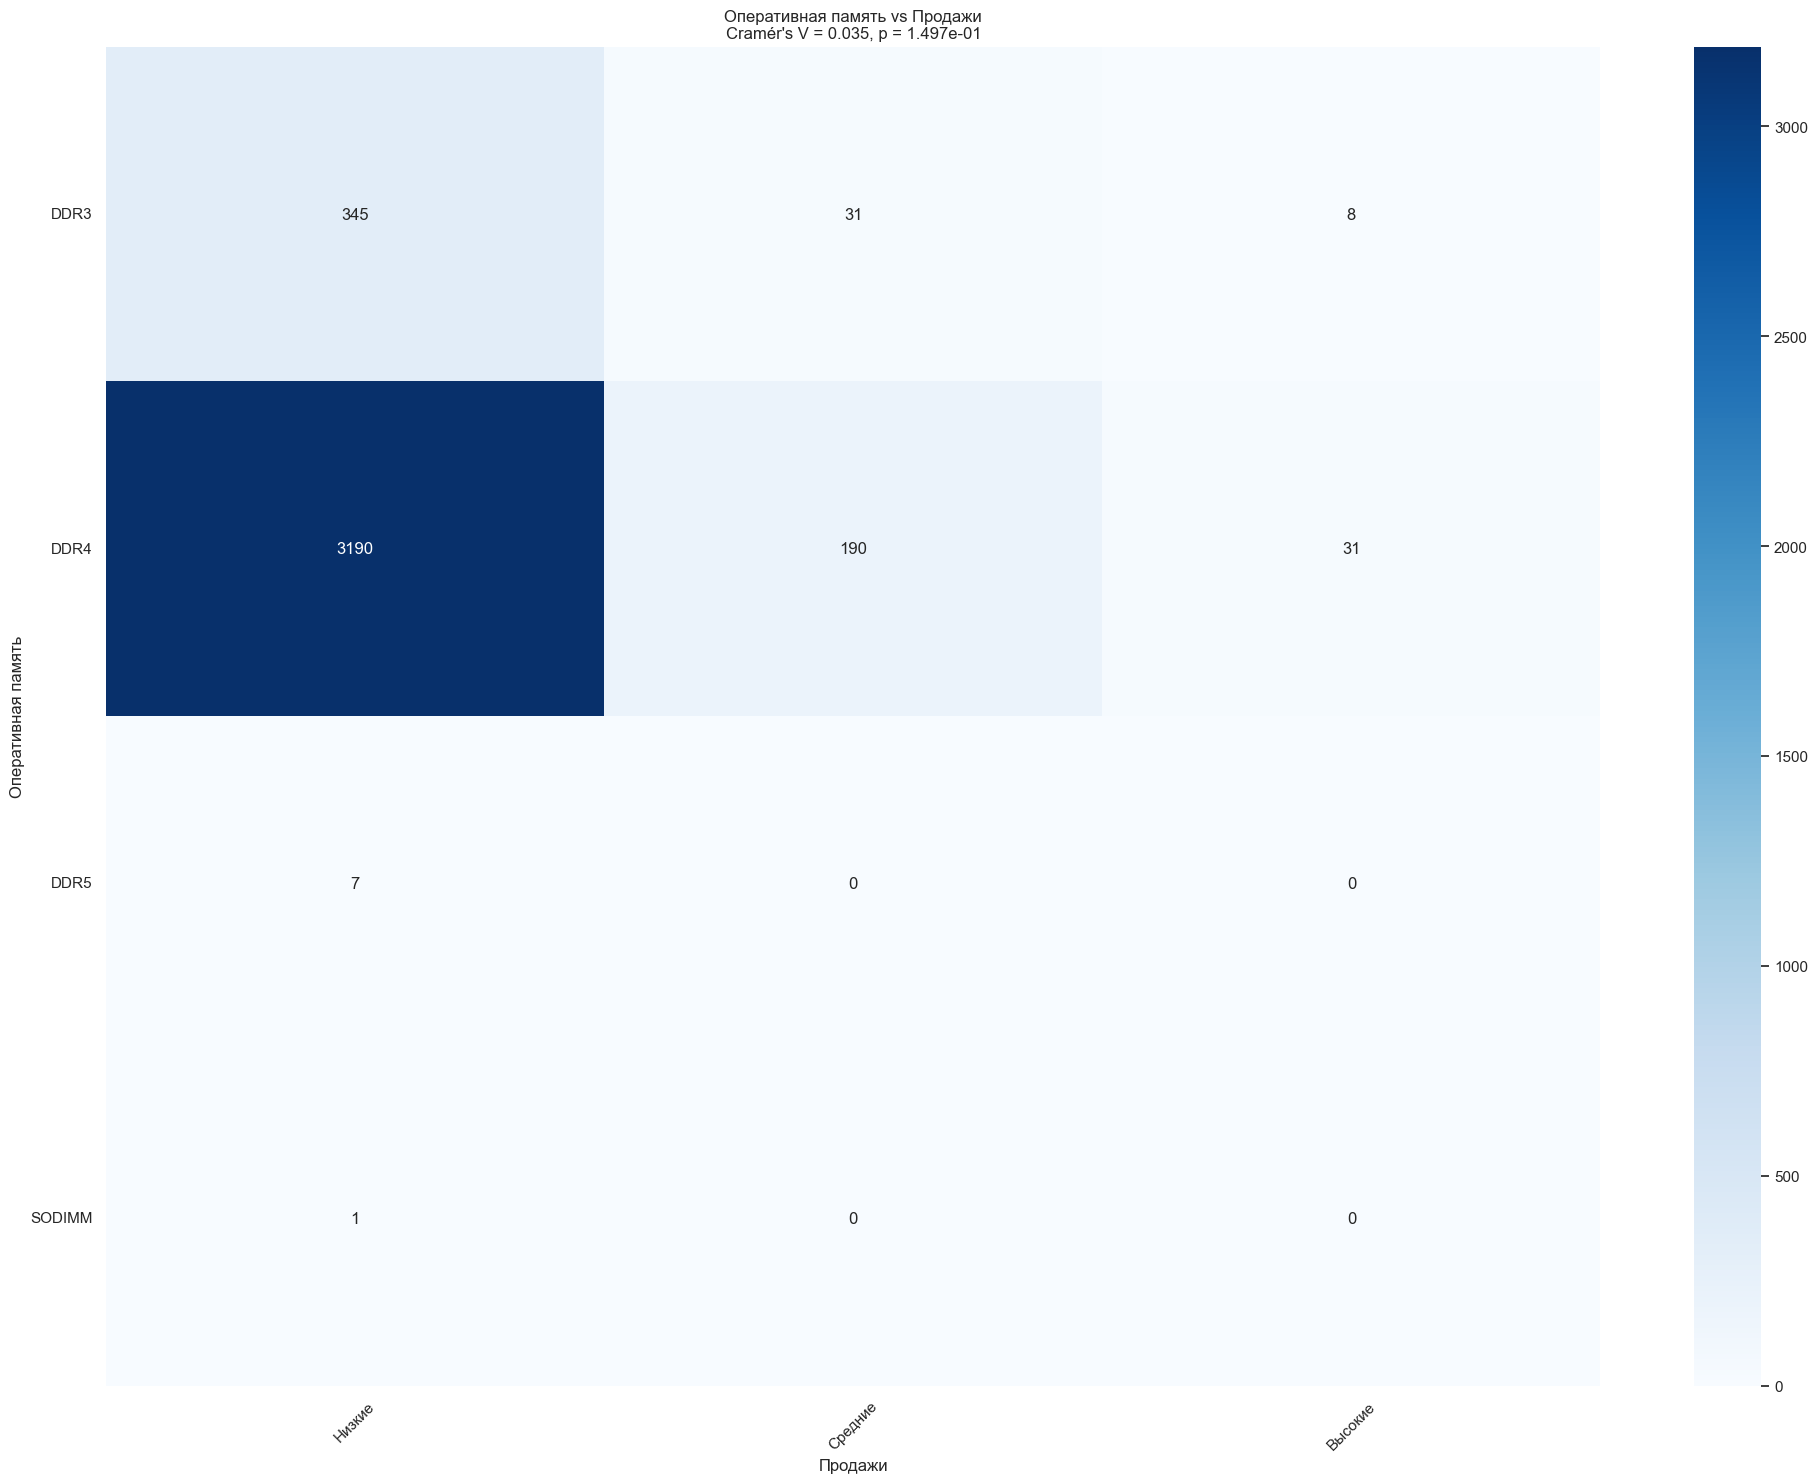


=== Видеопроцессор vs Продажи ===

Таблица сопряженности:
Продажи          Низкие  Средние  Высокие
Видеопроцессор                           
AMD R7 350            1        0        0
AMD RX 460            4        0        0
AMD RX 470            3        0        0
AMD RX 550           33        0        0
AMD RX 560            1        0        0
AMD RX 570           19        0        0
AMD RX 580           55        4        1
AMD RX 6500          12        0        0
AMD RX 6600          14        0        0
AMD RX 6700           5        0        0
AMD RX580             1        0        0
Intel HD            393       30        7
Intel UHD            77       21        1
Intel Unknown         7        0        0
Mali                  1        0        0
NVIDIA GT 1030      189       29        8
NVIDIA GT 610        16        1        0
NVIDIA GT 730        10        0        1
NVIDIA GT 740         4        0        0
NVIDIA GTX 1050      69        5        0
NVIDIA GTX 1060  

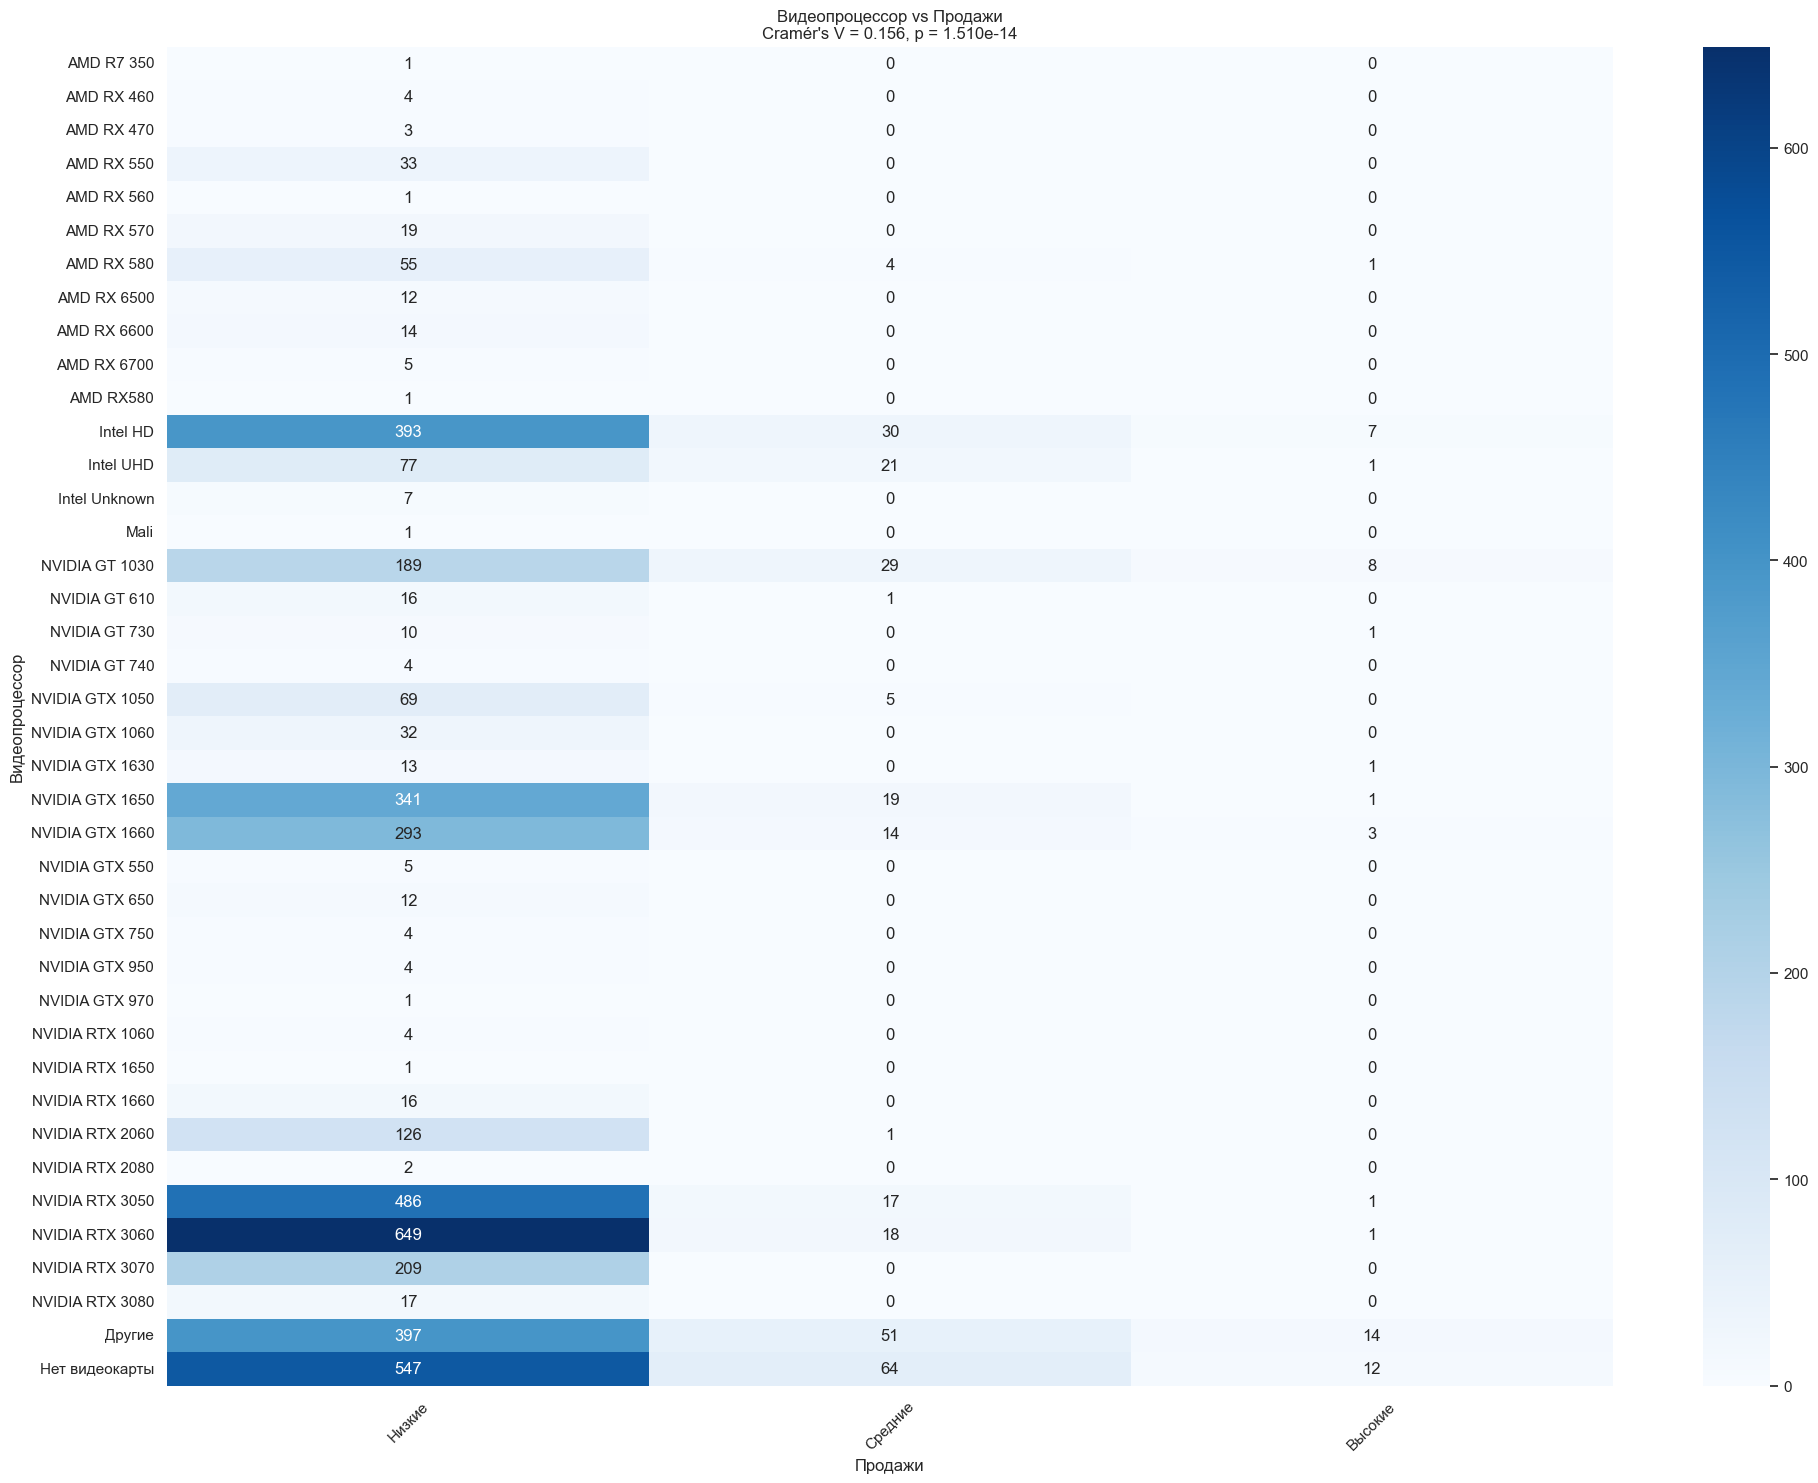


=== Операционная система vs Продажи ===

Таблица сопряженности:
Продажи                  Низкие  Средние  Высокие
Операционная система                             
linux                         5        0        0
macos                         4        0        0
windows                      42        9        2
windows 10                 2288      154       22
windows 10 home пробная       1        1        1
windows 10 пробная          124        2        1
windows 11                  779       13        1
windows пробная             200       35        8
отсутствует                 630       60       16

χ² = 141.964, p = 2.970e-22, Cramér's V = 0.127


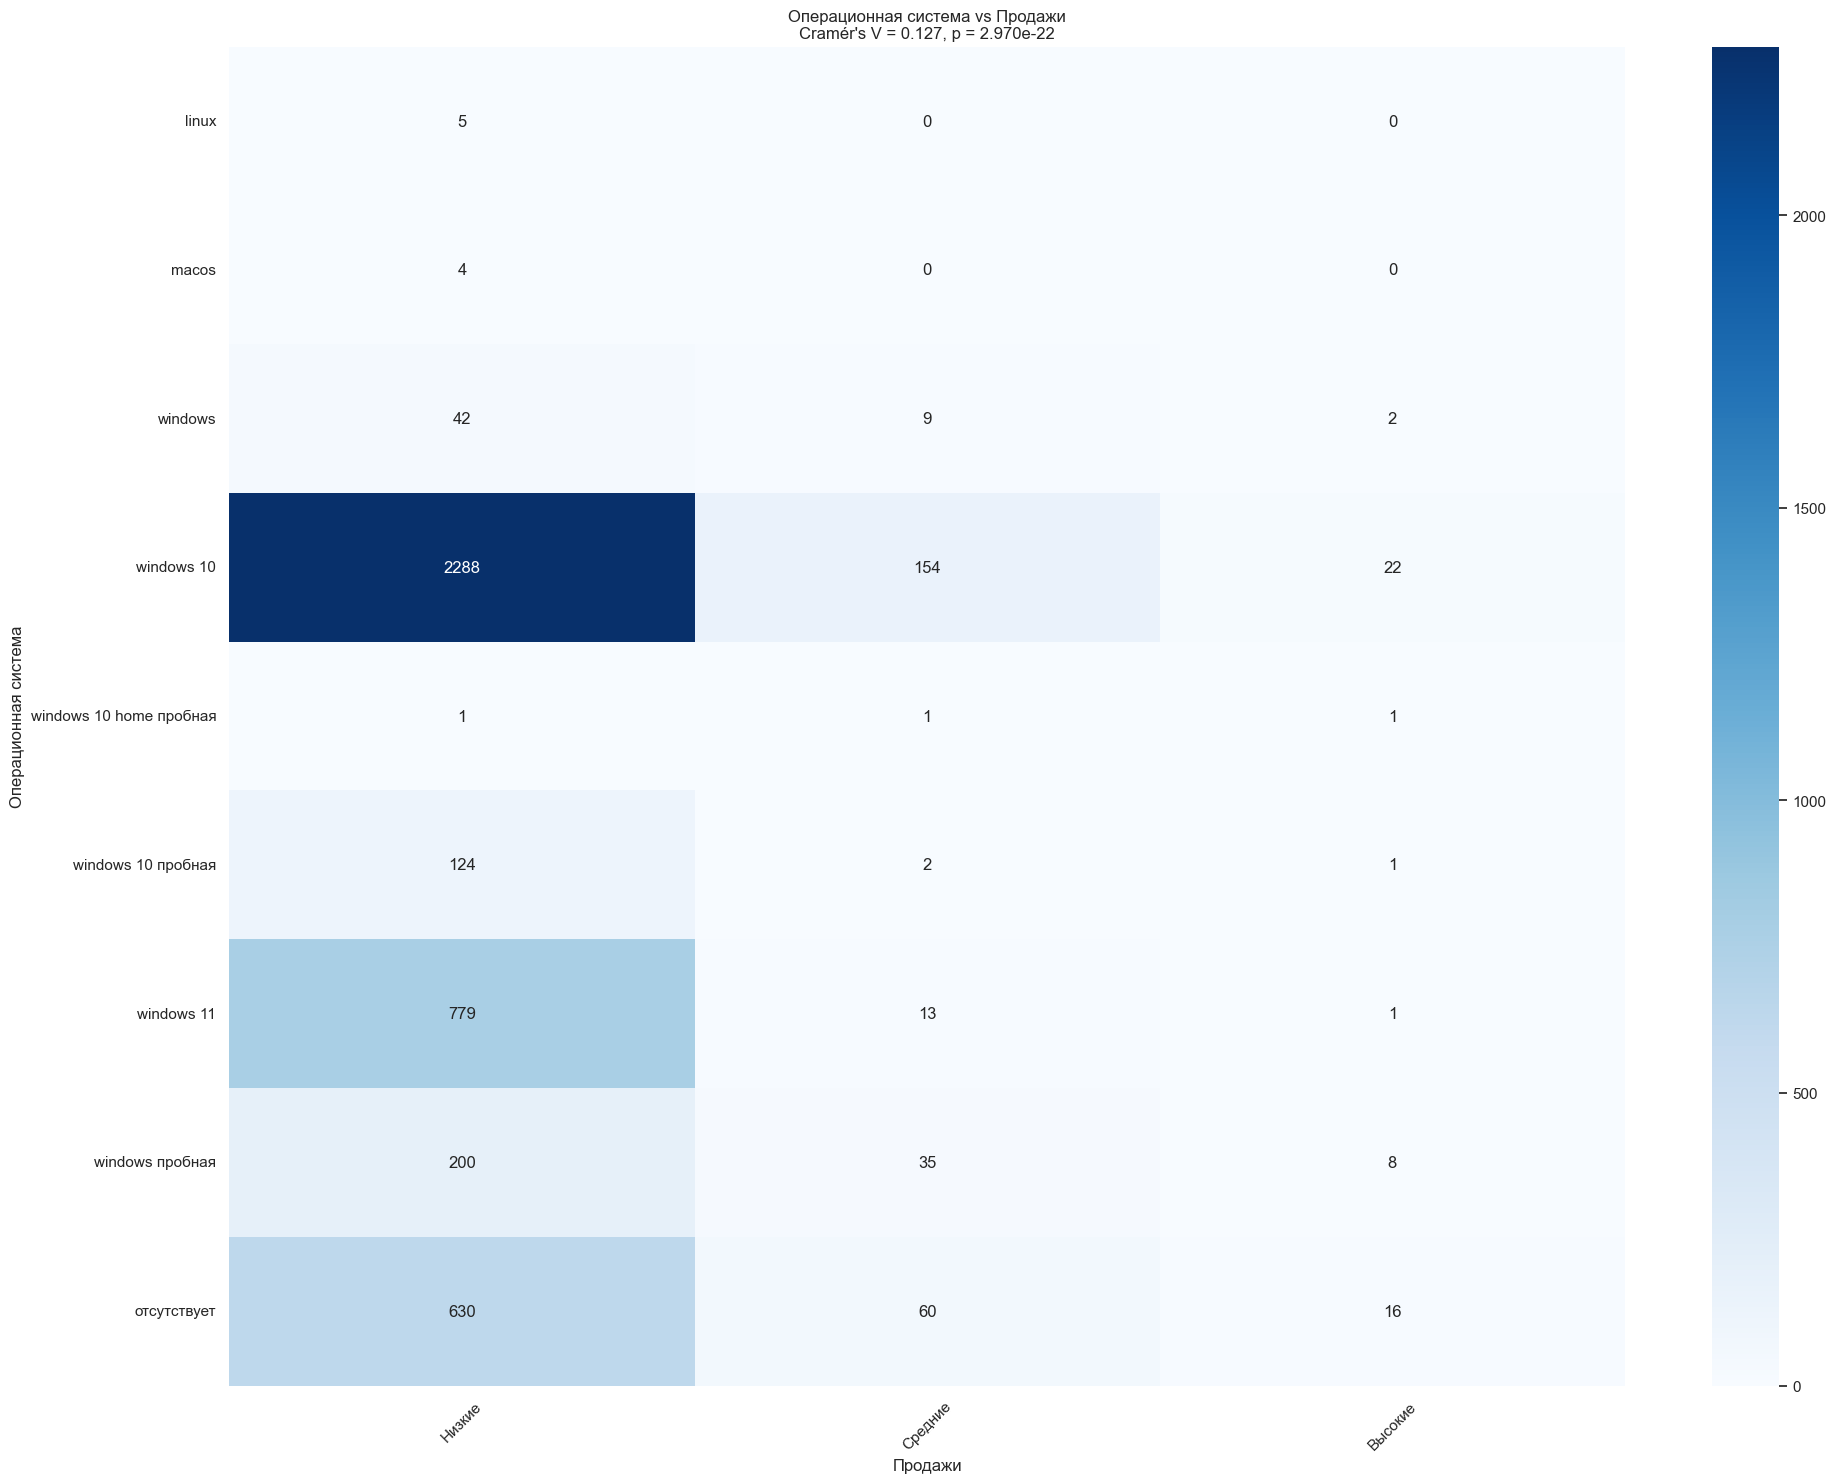


=== Итоговая таблица силы взаимосвязей ===
                Признак        Chi2       p-value  Cramér's V
0             Процессор  238.085941  1.871794e-22    0.164522
2        Видеопроцессор  213.551544  1.510154e-14    0.155815
3  Операционная система  141.964418  2.970346e-22    0.127042
1    Оперативная память    9.452105  1.497028e-01    0.035252


In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

cat_features = ['Процессор', 'Оперативная память', 'Видеопроцессор', 'Операционная система']
target_col = 'Продажи'

results = []

for feature in cat_features:
    print(f"\n=== {feature} vs {target_col} ===")

    contingency = pd.crosstab(df_filtered[feature], df_filtered[target_col])
    print("\nТаблица сопряженности:")
    print(contingency)
    chi2, p, dof, expected = chi2_contingency(contingency)
    v = cramers_v(contingency)

    print(f"\nχ² = {chi2:.3f}, p = {p:.3e}, Cramér's V = {v:.3f}")

    results.append({
        'Признак': feature,
        'Chi2': chi2,
        'p-value': p,
        "Cramér's V": v
    })
    plt.figure(figsize=(20, 15))
    sns.heatmap(contingency, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{feature} vs {target_col}\nCramér\'s V = {v:.3f}, p = {p:.3e}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# Таблица итогов
result_df = pd.DataFrame(results)
print("\n=== Итоговая таблица силы взаимосвязей ===")
print(result_df.sort_values("Cramér's V", ascending=False))


**Выводы:**
1. Видеопроцессор и Процессор имеют наиболее сильную и значимую связь с уровнем продаж.
2. Операционная система тоже влияет, но слабее.
3. Оперативная память по данным — практически не связана с продажами.

# **Регрессионная модель для предсказания стоимости компьютеров**

In [ ]:
df_filtered['Видеопроцессор'].unique()

array(['Нет видеокарты', 'Intel UHD', 'NVIDIA GTX 1660',
       'NVIDIA GTX 1650', 'NVIDIA RTX 3070', 'NVIDIA RTX 3050', 'Другие',
       'NVIDIA RTX 3060', 'NVIDIA GT 1030', 'Intel HD', 'NVIDIA GT 730',
       'AMD RX 580', 'NVIDIA GTX 1050', 'NVIDIA GT 740',
       'NVIDIA RTX 2060', 'NVIDIA GTX 1630', 'NVIDIA GT 610',
       'AMD RX 550', 'AMD RX 6500', 'NVIDIA RTX 3080', 'AMD RX580',
       'NVIDIA RTX 1650', 'AMD RX 6600', 'AMD RX 470', 'AMD RX 460',
       'AMD R7 350', 'NVIDIA RTX 1660', 'NVIDIA GTX 650', 'AMD RX 6700',
       'NVIDIA RTX 1060', 'NVIDIA GTX 1060', 'AMD RX 570',
       'NVIDIA GTX 550', 'NVIDIA GTX 750', 'NVIDIA GTX 950',
       'NVIDIA RTX 2080', 'AMD RX 560', 'Intel Unknown', 'NVIDIA GTX 970'],
      dtype=object)

In [ ]:
target = 'price'
features = ['Процессор', 'Оперативная память', 'Видеопроцессор',
            'Операционная система',
            'Количество ядер процессора', 'Объем оперативной памяти_Гб',
            'Объем HDD Гб', 'Объем SSD Гб']

from sklearn.ensemble import IsolationForest

df_filtered = df_filtered[df_filtered['price'] > 10000]



X = df_filtered[features]
y = df_filtered[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
categorical_features = ['Процессор', 'Оперативная память', 'Видеопроцессор', 'Операционная система']
numeric_features = list(set(features) - set(categorical_features))

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

model2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f} руб")
print(f"MAE: {mae:.2f} руб")
print(f"MAPE: {mape:.2f}%")


Mean Squared Error: 125491735.03
R^2 Score: 0.83
RMSE: 11202.31 руб
MAE: 7351.76 руб
MAPE: 15.44%


R² = 0.84 — это довольно хороший показатель. модель объясняет 84% дисперсии в ценах. Это высокий уровень качества, особенно для реальных данных, где много шума. Но при этом среднеквадратичная ошибка (MSE) очень большая, скорее всего это из за масштаба целевой переменной (цены). Поэтому расссмотрим другие метрики, такие как RMSE, MAE и MAPE

RMSE: в среднем, модель ошибается примерно на 11 700 руб.

MAE: 7 678 руб — показывает типичную ошибку модели, уже менее чувствительную к выбросам.

MAPE: 15.51% — модель в среднем ошибается на ~15.5% от истинной цены.

Модель достаточно хорошо предсказывает цены ноутбуков — как для внутреннего анализа, так и для помощи пользователям в оценке. При этом ошибка в 7–12 тыс. рублей — нормальна для такой ценовой категории (ноутбуки от 30 до 100+ тыс. руб), особенно если учесть разнообразие характеристик.


In [ ]:
df_filtered['price_scaled'] = df_filtered['price'] / 100

target = 'price_scaled'

features = ['Процессор', 'Оперативная память', 'Видеопроцессор',
            'Операционная система',
            'Количество ядер процессора', 'Объем оперативной памяти_Гб',
            'Объем HDD Гб', 'Объем SSD Гб']

from sklearn.ensemble import IsolationForest


iso = IsolationForest(contamination=0.01)
outliers = iso.fit_predict(df_filtered[['price']])
df_filtered = df_filtered[outliers == 1]

X = df_filtered[features]
y = df_filtered[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=2500)
categorical_features = ['Процессор', 'Оперативная память', 'Видеопроцессор', 'Операционная система']
numeric_features = list(set(features) - set(categorical_features))

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numeric_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f} руб")
print(f"MAE: {mae:.2f} руб")
print(f"MAPE: {mape:.2f}%")


Mean Squared Error: 12490.00
R^2 Score: 0.83
RMSE: 111.76 руб
MAE: 71.81 руб
MAPE: 14.53%


Примеры использования:

In [ ]:
sample_data = pd.DataFrame([{
    'Процессор': 'Intel Core i7',
    'Оперативная память': 'DDR4',
    'Видеопроцессор': 'NVIDIA GeForce RTX 3080',
    'Операционная система': 'Windows 11',
    'Количество ядер процессора': 8,
    'Объем оперативной памяти_Гб': 16,
    'Объем HDD Гб': 0,
    'Объем SSD Гб': 512
}])


In [ ]:
predicted_price = model2.predict(sample_data)[0]
print(f"Предсказанная цена: {predicted_price:.2f} руб")


Предсказанная цена: 68900.87 руб


In [ ]:
test_samples = pd.DataFrame([
    {
        'Процессор': 'Intel Core i5',
        'Оперативная память': 'DDR4',
        'Видеопроцессор': 'Intel Iris Xe Graphics',
        'Операционная система': 'Windows 10',
        'Количество ядер процессора': 4,
        'Объем оперативной памяти_Гб': 8,
        'Объем HDD Гб': 1000,
        'Объем SSD Гб': 128
    },
    {
        'Процессор': 'Apple M1',
        'Оперативная память': 'LPDDR5',
        'Видеопроцессор': 'Apple GPU',
        'Операционная система': 'macOS',
        'Количество ядер процессора': 8,
        'Объем оперативной памяти_Гб': 8,
        'Объем HDD Гб': 128,
        'Объем SSD Гб': 1000
    }
])

predicted_prices = model2.predict(test_samples)
for i, price in enumerate(predicted_prices, 1):
    print(f"Ноутбук {i}: {price:.2f} руб")


Ноутбук 1: 62593.77 руб
Ноутбук 2: 117521.57 руб


# **Итоги проведенного анализа**

## Общие выводы

## Что было выявлено в анализе цен на ноутбуки:

1. Цены на ноутбуки очень разные — от самых дешёвых до очень дорогих моделей.

2. Средняя цена в выборке около 62 тысяч рублей, что примерно соответствует средней цене на рынке.

3. Есть редкие, очень дорогие ноутбуки, которые немного искажают общий взгляд на цены.

## Какие характеристики влияют на цену?

1. Самое важное — это объем SSD (быстрого накопителя), количество ядер процессора и объем оперативной памяти. Чем больше и мощнее эти характеристики — тем выше цена ноутбука.

2. HDD (жесткий диск) влияет на цену, но гораздо меньше.

3. Часто ноутбуки с мощным процессором идут вместе с большим объемом SSD и памяти — это набор для дорогих моделей.

4. Операционная система тоже важна: например, ноутбуки с macOS стоят заметно дороже моделей с Windows.

## Что с продажами?

1. Дешёвые ноутбуки продаются чаще — они популярнее среди покупателей.

2. Мощные процессоры и хорошие видеокарты тоже влияют на продажи, но память почти не влияет.

## Рекомендации клиенту

1. Если вы хотите увеличить цену или выделить премиум-модели, делайте акцент на быстрых SSD, мощных процессорах и большом объёме оперативной памяти.

2. Для массового рынка лучше ориентироваться на модели с более скромными параметрами — они продаются лучше.

3. Следите за ассортиментом операционных систем — ноутбуки с macOS и некоторыми версиями Windows стоят дороже и занимают главный сегмент.

4. При анализе и прогнозах цены учитывайте, что очень дорогие ноутбуки могут сильно повлиять на качество анализа — лучше их фильтровать.
